# Weeaboo Subsite Overview

## Preliminary Preparations

In [1]:
import numpy as np
import pandas as pd

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns

import json
import yaml
import ast

import requests
import IPython.display as Disp

from re import findall
import itertools

from datetime import datetime
from datetime import tzinfo

%matplotlib inline
plt.rcParams["figure.figsize"] = [14, 10]

%config Completer.use_jedi = False

print("Imports Done!")

Imports Done!


In [2]:
PATH = "/home/aleksey/PycharmProjects/DTF_database_and_scrapper_config/"

In [3]:
weeaboo_origin = pd.read_csv(PATH + 'data_weeaboo_01_03.csv', index_col=0)
weeaboo_origin.reset_index(inplace=True)
weeaboo_origin.drop(columns=['index'], inplace=True)
weeaboo_origin.head()

,id,url,author,badges,commentsCount,commentsSeenCount,favoritesCount,cover,date,dateRFC,...,is_show_thanks,is_still_updating,is_filled_by_editors,isEditorial,audioUrl,hotness,commentEditor,summarize,repost,stackedRepostsAuthors
0,647719,https://dtf.ru/s/weaboo/647719-oficialnyy-disk...,"{'id': 130392, 'url': 'https://dtf.ru/u/130392...","[{'type': 'top', 'text': 'Виабу', 'background'...",46,NaN,13,"{'additionalData': {'size': 205672, 'type': 'p...",1613734784,"Fri, 19 Feb 2021 14:39:44 +0300",...,False,False,False,False,NaN,0,{'enabled': True},"Обсуждения аниме, манги и ранобе. Маленький кл...",NaN,NaN
1,657866,https://dtf.ru/s/weaboo/657866,"{'id': 154947, 'url': 'https://dtf.ru/u/154947...","[{'type': 'top', 'text': 'Виабу', 'background'...",0,NaN,0,"{'additionalData': {'size': 718474, 'type': 'g...",1614588748,"Mon, 01 Mar 2021 11:52:28 +0300",...,False,False,False,False,NaN,0,{'enabled': True},NaN,NaN,NaN
2,657858,https://dtf.ru/s/weaboo/657858-some-meme,"{'id': 124435, 'url': 'https://dtf.ru/u/124435...","[{'type': 'top', 'text': 'Виабу', 'background'...",0,NaN,1,"{'additionalData': {'size': 69598, 'type': 'jp...",1614588426,"Mon, 01 Mar 2021 11:47:06 +0300",...,False,False,False,False,NaN,0,{'enabled': True},#1memetime #weeaboo #shitpost #anime #meme,NaN,NaN
3,657849,https://dtf.ru/s/weaboo/657849,"{'id': 120739, 'url': 'https://dtf.ru/u/120739...","[{'type': 'top', 'text': 'Виабу', 'background'...",1,NaN,0,"{'additionalData': {'size': 403323, 'type': 'j...",1614587634,"Mon, 01 Mar 2021 11:33:54 +0300",...,False,False,False,False,NaN,0,{'enabled': True},NaN,NaN,NaN
4,657583,https://dtf.ru/u/130359-revendi/657583-horny-c...,"{'id': 130359, 'url': 'https://dtf.ru/u/130359...","[{'type': 'top', 'text': 'Revendi', 'backgroun...",2,NaN,17,"{'additionalData': {'size': 785074, 'type': 'j...",1614550081,"Mon, 01 Mar 2021 01:08:01 +0300",...,False,False,False,False,NaN,0,{'enabled': True},Внутри вкусно #виабу #чулки #horny,"{'author': {'id': 261696, 'url': 'https://dtf....",[]


In [4]:
weeaboo_origin.tail(3)

,id,url,author,badges,commentsCount,commentsSeenCount,favoritesCount,cover,date,dateRFC,...,is_show_thanks,is_still_updating,is_filled_by_editors,isEditorial,audioUrl,hotness,commentEditor,summarize,repost,stackedRepostsAuthors
6174,170958,https://dtf.ru/s/weaboo/170958,"{'id': 197370, 'url': 'https://dtf.ru/u/197370...","[{'type': 'top', 'text': 'Виабу', 'background'...",8,NaN,1,"{'additionalData': {'size': 2761663, 'type': '...",1594749437,"Tue, 14 Jul 2020 20:57:17 +0300",...,False,False,False,False,NaN,0,{'enabled': True},"Говоров красава, спасибо за анимемы на дтф",NaN,NaN
6175,170948,https://dtf.ru/s/weaboo/170948,"{'id': 92674, 'url': 'https://dtf.ru/u/92674-a...","[{'type': 'top', 'text': 'Виабу', 'background'...",6,NaN,1,"{'additionalData': {'size': 5588717, 'type': '...",1594748952,"Tue, 14 Jul 2020 20:49:12 +0300",...,False,False,False,False,NaN,0,{'enabled': True},Иначе я в Драме запосщу как они до меня домога...,NaN,NaN
6176,170920,https://dtf.ru/s/weaboo/170920-nu-che-pacany-a...,"{'id': 212847, 'url': 'https://dtf.ru/u/212847...","[{'type': 'top', 'text': 'Виабу', 'background'...",40,NaN,4,"{'additionalData': {'size': 287640, 'type': 'j...",1594746603,"Tue, 14 Jul 2020 20:10:03 +0300",...,False,False,False,False,NaN,0,{'enabled': True},"Еще один мертвый подсайт, но зато с аниме Вмес...",NaN,NaN


In [5]:
weeaboo_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6177 entries, 0 to 6176
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      6177 non-null   int64  
 1   url                     6177 non-null   object 
 2   author                  6177 non-null   object 
 3   badges                  6177 non-null   object 
 4   commentsCount           6177 non-null   int64  
 5   commentsSeenCount       0 non-null      float64
 6   favoritesCount          6177 non-null   int64  
 7   cover                   6018 non-null   object 
 8   date                    6177 non-null   int64  
 9   dateRFC                 6177 non-null   object 
 10  date_favorite           0 non-null      float64
 11  last_modification_date  6177 non-null   int64  
 12  hitsCount               6177 non-null   int64  
 13  intro                   3464 non-null   object 
 14  introInFeed             0 non-null      

**Потенциально полезно:**
- id -- ИД статьи в базе, инкрементный идентификатор
- url -- ссылка на статью
- author -- автор: словарь с данными, нужна обработка
- commentsCount -- кол-во комментов
- favoritesCount -- кол-во добавлений в закладки
- cover -- это КПДВ (нужно ли?)
- date -- unix timestamp
- dateRFC -- человекочитаемое время, UTC+3
- hitsCount -- просмотры
- isRepost -- бинарный маркер репоста
- likes -- лайки: словарь, нужна обработка
- subsite -- подсайт, в котором опубликован оригинал статьи
- title -- заголовок
- type -- тип статьи 
- entryContent -- содержимое поста
- repost -- подсайт из которого сделан репост: словарь, нужна обработка
- stackedRepostsAuthors -- репостнувшие пользователи/подсайты - список
- blocks -- содержимое поста поблочно. 
- summarize -- последний абзац/резюмирующий абзац - видимо, некая фича редактора

## Data Preprocessing

In [6]:
date_parser = lambda x: datetime.fromtimestamp(int(x)).strftime('%Y-%m-%d %H:%M:%S')

In [7]:
df = pd.read_csv(PATH + "data_weeaboo_01_03.csv", parse_dates=['date'], date_parser=date_parser, index_col=None, # None / 0 / ['date']
                   usecols=['id', 'url', 'author', 'commentsCount', 'favoritesCount', 'date', 
                            'hitsCount', 'isRepost', 'likes', 'subsite', 'title', 'type', 
                            'repost', 'stackedRepostsAuthors', 'blocks'])
df.head()

,id,url,author,commentsCount,favoritesCount,date,hitsCount,isRepost,likes,subsite,title,type,blocks,repost,stackedRepostsAuthors
0,647719,https://dtf.ru/s/weaboo/647719-oficialnyy-disk...,"{'id': 130392, 'url': 'https://dtf.ru/u/130392...",46,13,2021-02-19 14:39:44,754,False,"{'is_liked': 0, 'count': 47, 'summ': 47, 'is_h...","{'id': 261696, 'url': 'https://dtf.ru/s/weaboo...",Официальный дискорд Виабу,1,"[{'type': 'text', 'data': {'text': 'Сервер сно...",NaN,NaN
1,657866,https://dtf.ru/s/weaboo/657866,"{'id': 154947, 'url': 'https://dtf.ru/u/154947...",0,0,2021-03-01 11:52:28,5,False,"{'is_liked': 0, 'count': 2, 'summ': 2, 'is_hid...","{'id': 261696, 'url': 'https://dtf.ru/s/weaboo...",NaN,1,"[{'type': 'media', 'data': {'items': [{'title'...",NaN,NaN
2,657858,https://dtf.ru/s/weaboo/657858-some-meme,"{'id': 124435, 'url': 'https://dtf.ru/u/124435...",0,1,2021-03-01 11:47:06,13,False,"{'is_liked': 0, 'count': 6, 'summ': 6, 'is_hid...","{'id': 261696, 'url': 'https://dtf.ru/s/weaboo...",_some:Meme,1,"[{'type': 'text', 'data': {'text': '[\\#1memet...",NaN,NaN
3,657849,https://dtf.ru/s/weaboo/657849,"{'id': 120739, 'url': 'https://dtf.ru/u/120739...",1,0,2021-03-01 11:33:54,38,False,"{'is_liked': 0, 'count': 6, 'summ': 6, 'is_hid...","{'id': 261696, 'url': 'https://dtf.ru/s/weaboo...",NaN,1,"[{'type': 'media', 'data': {'items': [{'title'...",NaN,NaN
4,657583,https://dtf.ru/u/130359-revendi/657583-horny-c...,"{'id': 130359, 'url': 'https://dtf.ru/u/130359...",2,17,2021-03-01 01:08:01,243,True,"{'is_liked': 0, 'count': 31, 'summ': 31, 'is_h...","{'id': 130359, 'url': 'https://dtf.ru/u/130359...",Horny чулочки,1,"[{'type': 'text', 'data': {'text': 'Внутри вку...","{'author': {'id': 261696, 'url': 'https://dtf....",[]


In [8]:
df.shape

(6177, 15)

Нужно:
- id
- url
- author -- автор: словарь с данными, нужна обработка
- commentsCount -- кол-во комментов
- favoritesCount -- кол-во добавлений в закладки
- date -- unix timestamp
- dateRFC -- человекочитаемое время, UTC+3
- hitsCount -- просмотры
- isRepost -- бинарный маркер репоста
- likes -- лайки, словарь, нужна обработка
- subsite -- подсайт, в котором опубликован оригинал статьи
- title -- заголовок
- type -- тип статьи 
- repost -- подсайт из которого сделан репост, словарь, нужна обработка
- stackedRepostsAuthors -- репостнувшие пользователи/подсайты - список
- blocks -- содержимое поста поблочно. 

Извлечём виды контента, содержащиеся в посте.

In [9]:
def get_medias(media):
    """
        Extracting mediacontent types from pd.Series
    """
    medias = []
    for x in media:
        medias.append(x['type'])
    return(set(medias))    

Преобразуем лайки, автора и подсайт в удобочитаемый формат.

In [10]:
df['likes'] = df['likes'].apply(lambda x: ast.literal_eval(x))
df['likes'] = df['likes'].apply(lambda x: x.get('summ'))

medias = df.loc[:, 'blocks']
medias_resume_list = medias.apply(lambda x: ast.literal_eval(x))
df['media_content_types'] = medias_resume_list.apply(lambda el: get_medias(el))


df['author'] = df['author'].apply(lambda x: ast.literal_eval(x))
df['author_name'] = df['author'].apply(lambda x: x.get('name'))
df['author_type'] = df['author'].apply(lambda x: x.get('type'))
df['author_avatar_url'] = df['author'].apply(lambda x: x.get('avatar_url'))

df['subsite'] = df['subsite'].apply(lambda x: ast.literal_eval(x))
df['subsite'] = df['subsite'].apply(lambda x: x.get('name'))

In [11]:
df.head()

,id,url,author,commentsCount,favoritesCount,date,hitsCount,isRepost,likes,subsite,title,type,blocks,repost,stackedRepostsAuthors,media_content_types,author_name,author_type,author_avatar_url
0,647719,https://dtf.ru/s/weaboo/647719-oficialnyy-disk...,"{'id': 130392, 'url': 'https://dtf.ru/u/130392...",46,13,2021-02-19 14:39:44,754,False,47,Виабу,Официальный дискорд Виабу,1,"[{'type': 'text', 'data': {'text': 'Сервер сно...",NaN,NaN,"{video, quiz, list, delimiter, quote, media, t...",Kurisu Makise,1,https://leonardo.osnova.io/20c519c3-d035-5e1b-...
1,657866,https://dtf.ru/s/weaboo/657866,"{'id': 154947, 'url': 'https://dtf.ru/u/154947...",0,0,2021-03-01 11:52:28,5,False,2,Виабу,NaN,1,"[{'type': 'media', 'data': {'items': [{'title'...",NaN,NaN,{media},Koda,1,https://leonardo.osnova.io/c29d8c44-0073-48cc-...
2,657858,https://dtf.ru/s/weaboo/657858-some-meme,"{'id': 124435, 'url': 'https://dtf.ru/u/124435...",0,1,2021-03-01 11:47:06,13,False,6,Виабу,_some:Meme,1,"[{'type': 'text', 'data': {'text': '[\\#1memet...",NaN,NaN,"{text, media}",Suzume-sama said OKawaii Koto,1,https://leonardo.osnova.io/1315d174-7208-5a30-...
3,657849,https://dtf.ru/s/weaboo/657849,"{'id': 120739, 'url': 'https://dtf.ru/u/120739...",1,0,2021-03-01 11:33:54,38,False,6,Виабу,NaN,1,"[{'type': 'media', 'data': {'items': [{'title'...",NaN,NaN,{media},Diego Paw,1,https://leonardo.osnova.io/7df667af-003c-502d-...
4,657583,https://dtf.ru/u/130359-revendi/657583-horny-c...,"{'id': 130359, 'url': 'https://dtf.ru/u/130359...",2,17,2021-03-01 01:08:01,243,True,31,Revendi,Horny чулочки,1,"[{'type': 'text', 'data': {'text': 'Внутри вку...","{'author': {'id': 261696, 'url': 'https://dtf....",[],"{text, media}",Revendi,1,https://leonardo.osnova.io/cb64dbbb-dbba-eba3-...


---
### Проведём тесты на небольшом кусочке датасета
---

In [12]:
df_subs = df.loc[0:5, :]
df_subs

,id,url,author,commentsCount,favoritesCount,date,hitsCount,isRepost,likes,subsite,title,type,blocks,repost,stackedRepostsAuthors,media_content_types,author_name,author_type,author_avatar_url
0,647719,https://dtf.ru/s/weaboo/647719-oficialnyy-disk...,"{'id': 130392, 'url': 'https://dtf.ru/u/130392...",46,13,2021-02-19 14:39:44,754,False,47,Виабу,Официальный дискорд Виабу,1,"[{'type': 'text', 'data': {'text': 'Сервер сно...",NaN,NaN,"{video, quiz, list, delimiter, quote, media, t...",Kurisu Makise,1,https://leonardo.osnova.io/20c519c3-d035-5e1b-...
1,657866,https://dtf.ru/s/weaboo/657866,"{'id': 154947, 'url': 'https://dtf.ru/u/154947...",0,0,2021-03-01 11:52:28,5,False,2,Виабу,NaN,1,"[{'type': 'media', 'data': {'items': [{'title'...",NaN,NaN,{media},Koda,1,https://leonardo.osnova.io/c29d8c44-0073-48cc-...
2,657858,https://dtf.ru/s/weaboo/657858-some-meme,"{'id': 124435, 'url': 'https://dtf.ru/u/124435...",0,1,2021-03-01 11:47:06,13,False,6,Виабу,_some:Meme,1,"[{'type': 'text', 'data': {'text': '[\\#1memet...",NaN,NaN,"{text, media}",Suzume-sama said OKawaii Koto,1,https://leonardo.osnova.io/1315d174-7208-5a30-...
3,657849,https://dtf.ru/s/weaboo/657849,"{'id': 120739, 'url': 'https://dtf.ru/u/120739...",1,0,2021-03-01 11:33:54,38,False,6,Виабу,NaN,1,"[{'type': 'media', 'data': {'items': [{'title'...",NaN,NaN,{media},Diego Paw,1,https://leonardo.osnova.io/7df667af-003c-502d-...
4,657583,https://dtf.ru/u/130359-revendi/657583-horny-c...,"{'id': 130359, 'url': 'https://dtf.ru/u/130359...",2,17,2021-03-01 01:08:01,243,True,31,Revendi,Horny чулочки,1,"[{'type': 'text', 'data': {'text': 'Внутри вку...","{'author': {'id': 261696, 'url': 'https://dtf....",[],"{text, media}",Revendi,1,https://leonardo.osnova.io/cb64dbbb-dbba-eba3-...
5,657831,https://dtf.ru/s/weaboo/657831,"{'id': 334712, 'url': 'https://dtf.ru/u/334712...",0,1,2021-03-01 11:22:34,12,False,9,Виабу,NaN,1,"[{'type': 'media', 'data': {'items': [{'title'...",NaN,NaN,{media},Савва Лаков,1,https://leonardo.osnova.io/02293c89-0cd2-5168-...


In [13]:
df_subs['media_content_types']

0    {video, quiz, list, delimiter, quote, media, t...
1                                              {media}
2                                        {text, media}
3                                              {media}
4                                        {text, media}
5                                              {media}
Name: media_content_types, dtype: object

Создаём множество с самыми распространёнными типами контента в статьях. Остальное будем отлавливать специально.

In [14]:
etalon_set = {"media", "delimiter", "link", "header", "text", "video", "list", "telegram", "quote"}

In [15]:
df_subs.loc[:, 'exotic_media_type'] = df_subs.apply(lambda row: row.media_content_types - etalon_set, axis=1)
df_subs.loc[:, 'exotic_media_type'] = df_subs['exotic_media_type'].apply(lambda row: row if len(row) != 0 else 0)

/home/aleksey/PycharmProjects/Machine_Learning_test_area/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/home/aleksey/PycharmProjects/Machine_Learning_test_area/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


https://stackoverflow.com/questions/58528989/pandas-get-unique-values-from-column-of-lists

https://datascience.stackexchange.com/questions/17769/how-to-fill-missing-value-based-on-other-columns-in-pandas-dataframe

https://www.geeksforgeeks.org/create-a-new-column-in-pandas-dataframe-based-on-the-existing-columns/


In [16]:
df_subs['exotic_media_type'].explode().unique() 

array(['quiz', 0], dtype=object)

In [17]:
df_subs

,id,url,author,commentsCount,favoritesCount,date,hitsCount,isRepost,likes,subsite,title,type,blocks,repost,stackedRepostsAuthors,media_content_types,author_name,author_type,author_avatar_url,exotic_media_type
0,647719,https://dtf.ru/s/weaboo/647719-oficialnyy-disk...,"{'id': 130392, 'url': 'https://dtf.ru/u/130392...",46,13,2021-02-19 14:39:44,754,False,47,Виабу,Официальный дискорд Виабу,1,"[{'type': 'text', 'data': {'text': 'Сервер сно...",NaN,NaN,"{video, quiz, list, delimiter, quote, media, t...",Kurisu Makise,1,https://leonardo.osnova.io/20c519c3-d035-5e1b-...,{quiz}
1,657866,https://dtf.ru/s/weaboo/657866,"{'id': 154947, 'url': 'https://dtf.ru/u/154947...",0,0,2021-03-01 11:52:28,5,False,2,Виабу,NaN,1,"[{'type': 'media', 'data': {'items': [{'title'...",NaN,NaN,{media},Koda,1,https://leonardo.osnova.io/c29d8c44-0073-48cc-...,0
2,657858,https://dtf.ru/s/weaboo/657858-some-meme,"{'id': 124435, 'url': 'https://dtf.ru/u/124435...",0,1,2021-03-01 11:47:06,13,False,6,Виабу,_some:Meme,1,"[{'type': 'text', 'data': {'text': '[\\#1memet...",NaN,NaN,"{text, media}",Suzume-sama said OKawaii Koto,1,https://leonardo.osnova.io/1315d174-7208-5a30-...,0
3,657849,https://dtf.ru/s/weaboo/657849,"{'id': 120739, 'url': 'https://dtf.ru/u/120739...",1,0,2021-03-01 11:33:54,38,False,6,Виабу,NaN,1,"[{'type': 'media', 'data': {'items': [{'title'...",NaN,NaN,{media},Diego Paw,1,https://leonardo.osnova.io/7df667af-003c-502d-...,0
4,657583,https://dtf.ru/u/130359-revendi/657583-horny-c...,"{'id': 130359, 'url': 'https://dtf.ru/u/130359...",2,17,2021-03-01 01:08:01,243,True,31,Revendi,Horny чулочки,1,"[{'type': 'text', 'data': {'text': 'Внутри вку...","{'author': {'id': 261696, 'url': 'https://dtf....",[],"{text, media}",Revendi,1,https://leonardo.osnova.io/cb64dbbb-dbba-eba3-...,0
5,657831,https://dtf.ru/s/weaboo/657831,"{'id': 334712, 'url': 'https://dtf.ru/u/334712...",0,1,2021-03-01 11:22:34,12,False,9,Виабу,NaN,1,"[{'type': 'media', 'data': {'items': [{'title'...",NaN,NaN,{media},Савва Лаков,1,https://leonardo.osnova.io/02293c89-0cd2-5168-...,0


Произведём расчёт количества символов, слов, хэш-тэгов, а также медиаконтента, содержащегося в статьях.

Расчёт не очень точный, поскольку не учитывает подписи к изображениям и видео, а также содержимое твитов и ссылок на телеграм. 

Ссылки на твиттер, телеграм и прочие источники учитываются как один тип.

Также виджет инстаграма учитывается как одно изображение, вне зависимости от количества изображений в галерее. Это вызвано тем, что API Очобы не отдаёт информацию о типе содержимого виджета.

In [ ]:
https://stackoverflow.com/questions/48632356/python-extract-hashtags-out-of-a-text-file
    
https://stackoverflow.com/questions/2527892/parsing-a-tweet-to-extract-hashtags-into-an-array
    
    

https://stackoverflow.com/questions/48632356/python-extract-hashtags-out-of-a-text-file

In [18]:
def stats_counter(df: pd.DataFrame):
    
    symbols_by_block = []
    words_by_block = []
    image_counter = 0
    video_counter = 0
    links_counter = 0
    hashtags = []
      
    content_in_str = df['blocks']
    resume_list = ast.literal_eval(content_in_str) 
    
    for element in resume_list:
        if element['type'] in ['text', 'quote', 'header']:
            symbols_by_block.append(len(element['data']['text']))
            words_by_block.append(len(element['data']['text'].split()))
            hashtags.append(findall(r'#.*?(?=\s|$)', element['data']['text']))

        if element['type'] == 'list': 
            for elem in element['data']['items']:
                symbols_by_block.append(len(elem))
                words_by_block.append(len(elem.split()))
                hashtags.append(findall(r'#.*?(?=\s|$)', elem))
#                 Нужно попробовать вот этот паттерн [#][^\s#]+

        if element['type'] == 'video':
            video_counter += 1

        if element['type'] == 'media': 
            for elem in element['data']['items']:
                image_counter += 1

        if element['type'] in ['tweet', 'link', 'telegram']: 
            links_counter += 1
    
    hashtags = [x for x in hashtags if x != []]
    hashtags = list(itertools.chain(*hashtags))    

    return(sum(symbols_by_block), sum(words_by_block), image_counter, video_counter, links_counter, hashtags)

In [19]:
df_subs.apply(lambda row: stats_counter(row), axis=1)

0    (1938, 289, 2, 5, 1, [#weaboo, #discord, #аниме])
1                                  (0, 0, 1, 0, 0, [])
2    (106, 5, 1, 0, 0, [#1memetime](https://dtf.ru/...
3                                  (0, 0, 1, 0, 0, [])
4           (34, 5, 3, 0, 0, [#виабу, #чулки, #horny])
5                                  (0, 0, 1, 0, 0, [])
dtype: object

https://stackoverflow.com/questions/23586510/return-multiple-columns-from-pandas-apply

https://stackoverflow.com/questions/47969756/pandas-apply-function-that-returns-two-new-columns

https://stackoverflow.com/questions/16236684/apply-pandas-function-to-column-to-create-multiple-new-columns

In [20]:
df_subs[['symbols', 'words', 'images', 'videos', 'links', 'hashtags']] = \
df_subs.apply(lambda row: stats_counter(row), axis=1, result_type='expand')

/home/aleksey/PycharmProjects/Machine_Learning_test_area/lib/python3.8/site-packages/pandas/core/frame.py:3188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [21]:
df_subs.loc[2, :]

id                                                                  657858
url                               https://dtf.ru/s/weaboo/657858-some-meme
author                   {'id': 124435, 'url': 'https://dtf.ru/u/124435...
commentsCount                                                            0
favoritesCount                                                           1
date                                                   2021-03-01 11:47:06
hitsCount                                                               13
isRepost                                                             False
likes                                                                    6
subsite                                                              Виабу
title                                                           _some:Meme
type                                                                     1
blocks                   [{'type': 'text', 'data': {'text': '[\\#1memet...
repost                   

In [22]:
df_subs

,id,url,author,commentsCount,favoritesCount,date,hitsCount,isRepost,likes,subsite,...,author_name,author_type,author_avatar_url,exotic_media_type,symbols,words,images,videos,links,hashtags
0,647719,https://dtf.ru/s/weaboo/647719-oficialnyy-disk...,"{'id': 130392, 'url': 'https://dtf.ru/u/130392...",46,13,2021-02-19 14:39:44,754,False,47,Виабу,...,Kurisu Makise,1,https://leonardo.osnova.io/20c519c3-d035-5e1b-...,{quiz},1938,289,2,5,1,"[#weaboo, #discord, #аниме]"
1,657866,https://dtf.ru/s/weaboo/657866,"{'id': 154947, 'url': 'https://dtf.ru/u/154947...",0,0,2021-03-01 11:52:28,5,False,2,Виабу,...,Koda,1,https://leonardo.osnova.io/c29d8c44-0073-48cc-...,0,0,0,1,0,0,[]
2,657858,https://dtf.ru/s/weaboo/657858-some-meme,"{'id': 124435, 'url': 'https://dtf.ru/u/124435...",0,1,2021-03-01 11:47:06,13,False,6,Виабу,...,Suzume-sama said OKawaii Koto,1,https://leonardo.osnova.io/1315d174-7208-5a30-...,0,106,5,1,0,0,"[#1memetime](https://dtf.ru/tag/1memetime), #w..."
3,657849,https://dtf.ru/s/weaboo/657849,"{'id': 120739, 'url': 'https://dtf.ru/u/120739...",1,0,2021-03-01 11:33:54,38,False,6,Виабу,...,Diego Paw,1,https://leonardo.osnova.io/7df667af-003c-502d-...,0,0,0,1,0,0,[]
4,657583,https://dtf.ru/u/130359-revendi/657583-horny-c...,"{'id': 130359, 'url': 'https://dtf.ru/u/130359...",2,17,2021-03-01 01:08:01,243,True,31,Revendi,...,Revendi,1,https://leonardo.osnova.io/cb64dbbb-dbba-eba3-...,0,34,5,3,0,0,"[#виабу, #чулки, #horny]"
5,657831,https://dtf.ru/s/weaboo/657831,"{'id': 334712, 'url': 'https://dtf.ru/u/334712...",0,1,2021-03-01 11:22:34,12,False,9,Виабу,...,Савва Лаков,1,https://leonardo.osnova.io/02293c89-0cd2-5168-...,0,0,0,1,0,0,[]


---
### Возвращаемся к исходному датасету и применяем разработанные функции
---

In [23]:
df.apply(lambda row: stats_counter(row), axis=1)

0       (1938, 289, 2, 5, 1, [#weaboo, #discord, #аниме])
1                                     (0, 0, 1, 0, 0, [])
2       (106, 5, 1, 0, 0, [#1memetime](https://dtf.ru/...
3                                     (0, 0, 1, 0, 0, [])
4              (34, 5, 3, 0, 0, [#виабу, #чулки, #horny])
                              ...                        
6172                                  (0, 0, 1, 0, 0, [])
6173                                  (0, 0, 0, 1, 0, [])
6174                                 (42, 7, 1, 0, 0, [])
6175                               (181, 26, 1, 0, 0, [])
6176                               (118, 22, 1, 0, 0, [])
Length: 6177, dtype: object

In [24]:
df[['symbols', 'words', 'images', 'videos', 'links', 'hashtags']] = \
df.apply(lambda row: stats_counter(row), axis=1, result_type='expand')

In [25]:
df

,id,url,author,commentsCount,favoritesCount,date,hitsCount,isRepost,likes,subsite,...,media_content_types,author_name,author_type,author_avatar_url,symbols,words,images,videos,links,hashtags
0,647719,https://dtf.ru/s/weaboo/647719-oficialnyy-disk...,"{'id': 130392, 'url': 'https://dtf.ru/u/130392...",46,13,2021-02-19 14:39:44,754,False,47,Виабу,...,"{video, quiz, list, delimiter, quote, media, t...",Kurisu Makise,1,https://leonardo.osnova.io/20c519c3-d035-5e1b-...,1938,289,2,5,1,"[#weaboo, #discord, #аниме]"
1,657866,https://dtf.ru/s/weaboo/657866,"{'id': 154947, 'url': 'https://dtf.ru/u/154947...",0,0,2021-03-01 11:52:28,5,False,2,Виабу,...,{media},Koda,1,https://leonardo.osnova.io/c29d8c44-0073-48cc-...,0,0,1,0,0,[]
2,657858,https://dtf.ru/s/weaboo/657858-some-meme,"{'id': 124435, 'url': 'https://dtf.ru/u/124435...",0,1,2021-03-01 11:47:06,13,False,6,Виабу,...,"{text, media}",Suzume-sama said OKawaii Koto,1,https://leonardo.osnova.io/1315d174-7208-5a30-...,106,5,1,0,0,"[#1memetime](https://dtf.ru/tag/1memetime), #w..."
3,657849,https://dtf.ru/s/weaboo/657849,"{'id': 120739, 'url': 'https://dtf.ru/u/120739...",1,0,2021-03-01 11:33:54,38,False,6,Виабу,...,{media},Diego Paw,1,https://leonardo.osnova.io/7df667af-003c-502d-...,0,0,1,0,0,[]
4,657583,https://dtf.ru/u/130359-revendi/657583-horny-c...,"{'id': 130359, 'url': 'https://dtf.ru/u/130359...",2,17,2021-03-01 01:08:01,243,True,31,Revendi,...,"{text, media}",Revendi,1,https://leonardo.osnova.io/cb64dbbb-dbba-eba3-...,34,5,3,0,0,"[#виабу, #чулки, #horny]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6172,171001,https://dtf.ru/s/weaboo/171001-satdog,"{'id': 127404, 'url': 'https://dtf.ru/u/127404...",1,1,2020-07-14 21:43:51,130,False,20,Виабу,...,{media},Хасаги,1,https://leonardo.osnova.io/d1119c29-41a3-5997-...,0,0,1,0,0,[]
6173,170996,https://dtf.ru/s/weaboo/170996-milota,"{'id': 162369, 'url': 'https://dtf.ru/u/162369...",6,1,2020-07-14 21:34:11,106,False,18,Виабу,...,{video},Asuka Soryu,1,https://leonardo.osnova.io/64144586-685c-5ee8-...,0,0,0,1,0,[]
6174,170958,https://dtf.ru/s/weaboo/170958,"{'id': 197370, 'url': 'https://dtf.ru/u/197370...",8,1,2020-07-14 20:57:17,116,False,19,Виабу,...,"{text, media}",Le mort joyeux,1,https://leonardo.osnova.io/dc4f5913-3646-5404-...,42,7,1,0,0,[]
6175,170948,https://dtf.ru/s/weaboo/170948,"{'id': 92674, 'url': 'https://dtf.ru/u/92674-a...",6,1,2020-07-14 20:49:12,159,False,24,Виабу,...,"{text, media}",Ayan Myrzagali,1,https://leonardo.osnova.io/c6fbeb6b-56c0-586d-...,181,26,1,0,0,[]


In [26]:
etalon_set = {"media", "delimiter", "link", "header", "text", "video", "list", "telegram", "quote", "tweet"}

In [27]:
df.loc[:, 'exotic_media_type'] = df.apply(lambda row: row.media_content_types - etalon_set, axis=1)
df.loc[:, 'exotic_media_type'] = df['exotic_media_type'].apply(lambda row: row if len(row) != 0 else 0)

In [28]:
df['exotic_media_type'].explode().unique() 

array(['quiz', 0, 'person', 'incut', 'spotify', 'audio', 'warning',
       'instagram'], dtype=object)

Интересно! Ещё есть какие-то необычные типы медиаконтента. Посмотрим, что они из себя представляют. 

Особенно интересны: ```'incut' и 'number'```, поскольку остальные более-менее понятны: ссылка на человека/автора, ссылки на инсту, аудиофайл и голосование.

In [29]:
df[df['exotic_media_type'] != 0]

,id,url,author,commentsCount,favoritesCount,date,hitsCount,isRepost,likes,subsite,...,author_name,author_type,author_avatar_url,symbols,words,images,videos,links,hashtags,exotic_media_type
0,647719,https://dtf.ru/s/weaboo/647719-oficialnyy-disk...,"{'id': 130392, 'url': 'https://dtf.ru/u/130392...",46,13,2021-02-19 14:39:44,754,False,47,Виабу,...,Kurisu Makise,1,https://leonardo.osnova.io/20c519c3-d035-5e1b-...,1938,289,2,5,1,"[#weaboo, #discord, #аниме]",{quiz}
31,656894,https://dtf.ru/s/weaboo/656894-art-cumpilation...,"{'id': 286845, 'url': 'https://dtf.ru/u/286845...",12,27,2021-02-28 13:14:56,435,False,57,Виабу,...,Digo,1,https://leonardo.osnova.io/4240025b-b783-5cc1-...,30,4,13,0,0,"[#арт, #аниме, #виабу]",{person}
34,656814,https://dtf.ru/u/286845-digo/656814-art-cumpil...,"{'id': 286845, 'url': 'https://dtf.ru/u/286845...",11,37,2021-02-28 08:38:08,471,True,52,Digo,...,Digo,1,https://leonardo.osnova.io/4240025b-b783-5cc1-...,141,19,38,0,0,"[#арт, #аниме, #artcumpilation]",{person}
42,656284,https://dtf.ru/u/169967-just-no-chill/656284-s...,"{'id': 169967, 'url': 'https://dtf.ru/u/169967...",28,8,2021-02-27 14:54:45,424,True,31,Just No Chill,...,Just No Chill,1,https://leonardo.osnova.io/199de206-2dfc-57ee-...,341,49,4,0,0,[],{incut}
62,655351,https://dtf.ru/music/655351-nujabes-yaponskaya...,"{'id': 215354, 'url': 'https://dtf.ru/s/rap', ...",6,62,2021-02-26 16:20:19,756,True,73,Музыка,...,Rap & Hip-Hop,2,https://leonardo.osnova.io/c2a974ad-ebf9-53fc-...,2315,355,2,2,0,"[#nujabes, #sebajun]",{spotify}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5916,174588,https://dtf.ru/s/weaboo/174588-opa-vnutri-nark...,"{'id': 212847, 'url': 'https://dtf.ru/u/212847...",2,5,2020-07-20 18:56:00,200,False,22,Виабу,...,Лолег,1,https://leonardo.osnova.io/b6f745b6-3963-56d5-...,0,0,9,0,0,[],{quiz}
5920,174556,https://dtf.ru/s/weaboo/174556-grab-his-dick,"{'id': 193363, 'url': 'https://dtf.ru/u/193363...",1,2,2020-07-20 18:08:16,167,False,11,Виабу,...,Layben,1,https://leonardo.osnova.io/7fec5e46-2507-5dcd-...,0,0,1,0,0,[],{quiz}
5935,174390,https://dtf.ru/s/weaboo/174390-who,"{'id': 197370, 'url': 'https://dtf.ru/u/197370...",11,2,2020-07-20 13:49:07,152,False,7,Виабу,...,Le mort joyeux,1,https://leonardo.osnova.io/dc4f5913-3646-5404-...,0,0,3,0,0,[],{quiz}
5963,173966,https://dtf.ru/s/weaboo/173966-vnutri-posmeyat...,"{'id': 212847, 'url': 'https://dtf.ru/u/212847...",20,4,2020-07-19 18:30:46,221,False,10,Виабу,...,Лолег,1,https://leonardo.osnova.io/b6f745b6-3963-56d5-...,0,0,15,0,0,[],{quiz}


In [30]:
# df.loc[df['exotic_media_type'].isin(['warning'])]

In [31]:
df.loc[[44, 64, 72, 81, 101, 114], ["url", "exotic_media_type"]]

,url,exotic_media_type
44,https://dtf.ru/s/weaboo/656238-soglasny,0
64,https://dtf.ru/s/weaboo/655558-posledniy-you-v...,0
72,https://dtf.ru/s/weaboo/655348-minority-soldie...,0
81,https://dtf.ru/u/154947-koda/655180-you-you-yo...,0
101,https://dtf.ru/s/weaboo/654404,0
114,https://dtf.ru/s/weaboo/653774,0


In [32]:
df.loc[[44, 64, 72, 81, 101, 114], "url"]

44               https://dtf.ru/s/weaboo/656238-soglasny
64     https://dtf.ru/s/weaboo/655558-posledniy-you-v...
72     https://dtf.ru/s/weaboo/655348-minority-soldie...
81     https://dtf.ru/u/154947-koda/655180-you-you-yo...
101                       https://dtf.ru/s/weaboo/654404
114                       https://dtf.ru/s/weaboo/653774
Name: url, dtype: object

In [33]:
ma_alter = df.loc[101, :]
ma_alter

id                                                                  654404
url                                         https://dtf.ru/s/weaboo/654404
author                   {'id': 272086, 'url': 'https://dtf.ru/u/272086...
commentsCount                                                            5
favoritesCount                                                           6
date                                                   2021-02-25 16:00:40
hitsCount                                                              141
isRepost                                                             False
likes                                                                   36
subsite                                                              Виабу
title                                                                  NaN
type                                                                     1
blocks                   [{'type': 'media', 'data': {'items': [{'title'...
repost                   

In [34]:
ma_alter_in_str = ma_alter['blocks']
ma_alter_res_list = ast.literal_eval(ma_alter_in_str)

print(type(ma_alter_res_list))
print(len(ma_alter_res_list))
print(ma_alter_res_list)

<class 'list'>
1
[{'type': 'media', 'data': {'items': [{'title': '', 'author': '', 'image': {'type': 'image', 'data': {'uuid': 'a87115f0-6653-56f4-8ed3-5236e27414e6', 'width': 2048, 'height': 1769, 'size': 296341, 'type': 'jpg', 'color': 'ac87a1', 'hash': '', 'external_service': []}}}], 'with_background': True, 'with_border': False}, 'cover': True, 'anchor': ''}]


In [35]:
content_types_ma_alter = set()

for num, element in enumerate(ma_alter_res_list):
    content_types_ma_alter.add(element['type'])
    print("\nNumber of block = {}, \nContent = {}".format(num+1, element))

print("\n")
print(content_types_ma_alter)


Number of block = 1, 
Content = {'type': 'media', 'data': {'items': [{'title': '', 'author': '', 'image': {'type': 'image', 'data': {'uuid': 'a87115f0-6653-56f4-8ed3-5236e27414e6', 'width': 2048, 'height': 1769, 'size': 296341, 'type': 'jpg', 'color': 'ac87a1', 'hash': '', 'external_service': []}}}], 'with_background': True, 'with_border': False}, 'cover': True, 'anchor': ''}


{'media'}


In [36]:
for element in ma_alter_res_list:
    if element['type'] in ['number']:
        print(len(element['data']['title'].split()))
        print('asd')

In [37]:
ma_alter_symbols_by_block = []
ma_alter_words_by_block = []
ma_alter_media_counter = 0
ma_alter_counter = 0

for element in ma_alter_res_list:
    if element['type'] in ['text', 'quote', 'header', 'incut']:
        print("\nSymbols = {}, \nWords = {}, \nText: {}".format(len(element['data']['text']), 
                                                             len(element['data']['text'].split()),
                                                             element['data']['text']))
        ma_alter_symbols_by_block.append(len(element['data']['text']))
        ma_alter_words_by_block.append(len(element['data']['text'].split())) 
        
    if element['type'] == 'list': 
        for elem in element['data']['items']:
            print("\nSymbols = {}, \nWords = {}, \nText: {}".format(len(elem), 
                                                                        len(elem.split()),
                                                                        elem))
            ma_alter_symbols_by_block.append(len(elem))
            ma_alter_words_by_block.append(len(elem.split()))
        
    if element['type'] == 'media': 
        for elem in element['data']['items']:
            print("\n{}".format(elem['image']))
            ma_alter_media_counter += 1
            ma_alter_symbols_by_block.append(len(elem['title']))
            ma_alter_words_by_block.append(len(elem['title'].split())) 
            
    if element['type'] == 'instagram': 
        ma_alter_media_counter += 1
        
    if element['type'] == 'number': 
        ma_alter_symbols_by_block.append(len(element['data']['title']))
        ma_alter_words_by_block.append(len(element['data']['title'].split())) 
            
    elif element['type'] in ['tweet', 'link']: 
#         print("\n{}".format(element['data'])) # количество информации в твитах огромное, выводить не стоит
        ma_alter_counter += 1
    
print("\nRESUME: \nSymbols total = {} \nWords total = {} \nMediaContent TYPE:MEDIA = {} \nMediaContent TYPE:LINKS = {}". \
      format(sum(ma_alter_symbols_by_block), sum(ma_alter_words_by_block), ma_alter_media_counter, ma_alter_counter))



{'type': 'image', 'data': {'uuid': 'a87115f0-6653-56f4-8ed3-5236e27414e6', 'width': 2048, 'height': 1769, 'size': 296341, 'type': 'jpg', 'color': 'ac87a1', 'hash': '', 'external_service': []}}

RESUME: 
Symbols total = 0 
Words total = 0 
MediaContent TYPE:MEDIA = 1 
MediaContent TYPE:LINKS = 0


# Добавить NUMER, INCUT, подписи к изображениям и видео в функцию!

In [38]:
def stats_counter(df: pd.DataFrame):
    
    symbols_by_block = []
    words_by_block = []
    image_counter = 0
    video_counter = 0
    links_counter = 0
    hashtags = []
      
    content_in_str = df['blocks']
    resume_list = ast.literal_eval(content_in_str) 
    
    for element in resume_list:
        if element['type'] in ['text', 'quote', 'header', 'incut']:
            symbols_by_block.append(len(element['data']['text']))
            words_by_block.append(len(element['data']['text'].split()))
            hashtags.append(findall(r'#.*?(?=\s|$)', element['data']['text']))

        if element['type'] == 'list': 
            for elem in element['data']['items']:
                symbols_by_block.append(len(elem))
                words_by_block.append(len(elem.split()))
                hashtags.append(findall(r'#.*?(?=\s|$)', elem))

        if element['type'] == 'video':
            video_counter += 1

        if element['type'] == 'media': 
            for elem in element['data']['items']:
                image_counter += 1
                symbols_by_block.append(len(elem['title']))
                words_by_block.append(len(elem['title'].split())) 
                
        if element['type'] == 'instagram': 
            image_counter += 1

        if element['type'] in ['tweet', 'link', 'telegram']: 
            links_counter += 1
    
    hashtags = [x for x in hashtags if x != []]
    hashtags = list(itertools.chain(*hashtags))    

    return(sum(symbols_by_block), sum(words_by_block), image_counter, video_counter, links_counter, hashtags)

In [39]:
df_subs.loc[4, :]

id                                                                  657583
url                      https://dtf.ru/u/130359-revendi/657583-horny-c...
author                   {'id': 130359, 'url': 'https://dtf.ru/u/130359...
commentsCount                                                            2
favoritesCount                                                          17
date                                                   2021-03-01 01:08:01
hitsCount                                                              243
isRepost                                                              True
likes                                                                   31
subsite                                                            Revendi
title                                                        Horny чулочки
type                                                                     1
blocks                   [{'type': 'text', 'data': {'text': 'Внутри вку...
repost                   

In [40]:
ma_alter = df_subs.loc[4, :]

In [41]:
ma_alter_in_str = ma_alter['blocks']
ma_alter_res_list = ast.literal_eval(ma_alter_in_str)

print(type(ma_alter_res_list))
print(len(ma_alter_res_list))
print(ma_alter_res_list)

<class 'list'>
5
[{'type': 'text', 'data': {'text': 'Внутри вкусно', 'text_truncated': '<<<same>>>'}, 'cover': True, 'anchor': ''}, {'type': 'media', 'data': {'items': [{'title': '', 'author': '', 'image': {'type': 'image', 'data': {'uuid': '849083ee-e9de-5737-94a3-a715988f4da3', 'width': 859, 'height': 1208, 'size': 785074, 'type': 'jpg', 'color': 'ceb9b5', 'hash': '', 'external_service': []}}}], 'with_background': False, 'with_border': False}, 'cover': True, 'anchor': ''}, {'type': 'media', 'data': {'items': [{'title': '', 'author': '', 'image': {'type': 'image', 'data': {'uuid': '65da9a47-cd30-50ee-a057-06c4b8cde1cc', 'width': 4327, 'height': 2802, 'size': 317196, 'type': 'jpg', 'color': '422828', 'hash': '', 'external_service': []}}}], 'with_background': False, 'with_border': False}, 'cover': False, 'anchor': ''}, {'type': 'media', 'data': {'items': [{'title': '', 'author': '', 'image': {'type': 'image', 'data': {'uuid': '426be973-0de1-574a-b392-b2738cc7c7ed', 'width': 2480, 'heigh

In [42]:
content_types_ma_alter = set()

for num, element in enumerate(ma_alter_res_list):
    content_types_ma_alter.add(element['type'])
    print("\nNumber of block = {}, \nContent = {}".format(num+1, element))

print("\n")
print(content_types_ma_alter)


Number of block = 1, 
Content = {'type': 'text', 'data': {'text': 'Внутри вкусно', 'text_truncated': '<<<same>>>'}, 'cover': True, 'anchor': ''}

Number of block = 2, 
Content = {'type': 'media', 'data': {'items': [{'title': '', 'author': '', 'image': {'type': 'image', 'data': {'uuid': '849083ee-e9de-5737-94a3-a715988f4da3', 'width': 859, 'height': 1208, 'size': 785074, 'type': 'jpg', 'color': 'ceb9b5', 'hash': '', 'external_service': []}}}], 'with_background': False, 'with_border': False}, 'cover': True, 'anchor': ''}

Number of block = 3, 
Content = {'type': 'media', 'data': {'items': [{'title': '', 'author': '', 'image': {'type': 'image', 'data': {'uuid': '65da9a47-cd30-50ee-a057-06c4b8cde1cc', 'width': 4327, 'height': 2802, 'size': 317196, 'type': 'jpg', 'color': '422828', 'hash': '', 'external_service': []}}}], 'with_background': False, 'with_border': False}, 'cover': False, 'anchor': ''}

Number of block = 4, 
Content = {'type': 'media', 'data': {'items': [{'title': '', 'author'

In [43]:
ma_alter_symbols_by_block = []
ma_alter_words_by_block = []
ma_alter_media_counter = 0
ma_alter_counter = 0

for element in ma_alter_res_list:
    if element['type'] in ['text', 'quote', 'header', 'incut']:
        print("\nSymbols = {}, \nWords = {}, \nText: {}".format(len(element['data']['text']), 
                                                             len(element['data']['text'].split()),
                                                             element['data']['text']))
        ma_alter_symbols_by_block.append(len(element['data']['text']))
        ma_alter_words_by_block.append(len(element['data']['text'].split())) 
        
    if element['type'] == 'list': 
        for elem in element['data']['items']:
            print("\nSymbols = {}, \nWords = {}, \nText: {}".format(len(elem), 
                                                                        len(elem.split()),
                                                                        elem))
            ma_alter_symbols_by_block.append(len(elem))
            ma_alter_words_by_block.append(len(elem.split()))
        
    if element['type'] == 'media': 
        for elem in element['data']['items']:
            print("\n{}".format(elem['image']))
            ma_alter_media_counter += 1
            ma_alter_symbols_by_block.append(len(elem['title']))
            ma_alter_words_by_block.append(len(elem['title'].split())) 
    
    if element['type'] == 'video':
#         video_counter += 1
        ma_alter_symbols_by_block.append(len(element['data']['title']))
        ma_alter_words_by_block.append(len(element['data']['title'].split())) 
    
    if element['type'] == 'instagram': 
        ma_alter_media_counter += 1
        
    if element['type'] == 'number': 
        ma_alter_symbols_by_block.append(len(element['data']['title']))
        ma_alter_words_by_block.append(len(element['data']['title'].split())) 
            
    elif element['type'] in ['tweet', 'link']: 
#         print("\n{}".format(element['data'])) # количество информации в твитах огромное, выводить не стоит
        ma_alter_counter += 1
    
print("\nRESUME: \nSymbols total = {} \nWords total = {} \nMediaContent TYPE:MEDIA = {} \nMediaContent TYPE:LINKS = {}". \
      format(sum(ma_alter_symbols_by_block), sum(ma_alter_words_by_block), ma_alter_media_counter, ma_alter_counter))



Symbols = 13, 
Words = 2, 
Text: Внутри вкусно

{'type': 'image', 'data': {'uuid': '849083ee-e9de-5737-94a3-a715988f4da3', 'width': 859, 'height': 1208, 'size': 785074, 'type': 'jpg', 'color': 'ceb9b5', 'hash': '', 'external_service': []}}

{'type': 'image', 'data': {'uuid': '65da9a47-cd30-50ee-a057-06c4b8cde1cc', 'width': 4327, 'height': 2802, 'size': 317196, 'type': 'jpg', 'color': '422828', 'hash': '', 'external_service': []}}

{'type': 'image', 'data': {'uuid': '426be973-0de1-574a-b392-b2738cc7c7ed', 'width': 2480, 'height': 3508, 'size': 829171, 'type': 'jpg', 'color': '3e2e30', 'hash': '', 'external_service': []}}

Symbols = 21, 
Words = 3, 
Text: \#виабу #чулки #horny

RESUME: 
Symbols total = 34 
Words total = 5 
MediaContent TYPE:MEDIA = 3 
MediaContent TYPE:LINKS = 0


# Exploratory Data Analysis

Разведочный анализ данных, визуализации, статистические исследования

Что можно сделать или проверить?

- Построить диаграммы рассеивания для параметров: лайки, кол-во медиаконтента, просмотры, комментарии

- Посмотреть корреляции между величинами

- Посчитать базовые описательные статистики: количество, средние 

- Кто написал максимальное количество статей?

- У кого самые популярные статьи? Критерии оценки: кол-во комментариев, просмотров, лайков.

- Посмотреть на описательные статистики по дням недели или по неделям

- Построить распределение длины постов: Кол-во постов в % от длины символов

In [44]:
df.head()

,id,url,author,commentsCount,favoritesCount,date,hitsCount,isRepost,likes,subsite,...,author_name,author_type,author_avatar_url,symbols,words,images,videos,links,hashtags,exotic_media_type
0,647719,https://dtf.ru/s/weaboo/647719-oficialnyy-disk...,"{'id': 130392, 'url': 'https://dtf.ru/u/130392...",46,13,2021-02-19 14:39:44,754,False,47,Виабу,...,Kurisu Makise,1,https://leonardo.osnova.io/20c519c3-d035-5e1b-...,1938,289,2,5,1,"[#weaboo, #discord, #аниме]",{quiz}
1,657866,https://dtf.ru/s/weaboo/657866,"{'id': 154947, 'url': 'https://dtf.ru/u/154947...",0,0,2021-03-01 11:52:28,5,False,2,Виабу,...,Koda,1,https://leonardo.osnova.io/c29d8c44-0073-48cc-...,0,0,1,0,0,[],0
2,657858,https://dtf.ru/s/weaboo/657858-some-meme,"{'id': 124435, 'url': 'https://dtf.ru/u/124435...",0,1,2021-03-01 11:47:06,13,False,6,Виабу,...,Suzume-sama said OKawaii Koto,1,https://leonardo.osnova.io/1315d174-7208-5a30-...,106,5,1,0,0,"[#1memetime](https://dtf.ru/tag/1memetime), #w...",0
3,657849,https://dtf.ru/s/weaboo/657849,"{'id': 120739, 'url': 'https://dtf.ru/u/120739...",1,0,2021-03-01 11:33:54,38,False,6,Виабу,...,Diego Paw,1,https://leonardo.osnova.io/7df667af-003c-502d-...,0,0,1,0,0,[],0
4,657583,https://dtf.ru/u/130359-revendi/657583-horny-c...,"{'id': 130359, 'url': 'https://dtf.ru/u/130359...",2,17,2021-03-01 01:08:01,243,True,31,Revendi,...,Revendi,1,https://leonardo.osnova.io/cb64dbbb-dbba-eba3-...,34,5,3,0,0,"[#виабу, #чулки, #horny]",0


In [45]:
test = pd.Series([x for item in df.hashtags for x in item]).value_counts()
test.head(10)

#anime                               539
#art                                 495
#animeme                             428
#nsfw                                413
#weaboo                              351
#shitpost                            308
#anime](https://dtf.ru/tag/anime)    146
#виабу                               143
#meme](https://dtf.ru/tag/meme)      132
#vtuber                              124
dtype: int64

In [46]:
df.set_index('date', inplace=True)
df.index = pd.to_datetime(df.index)

In [47]:
df["hour"] = df.index.hour
df["weekday"] = df.index.day_name() #.weekday
df['is_weekend'] = df.weekday.isin(['Saturday',  'Sunday'])*1

In [48]:
df.head()

,id,url,author,commentsCount,favoritesCount,hitsCount,isRepost,likes,subsite,title,...,symbols,words,images,videos,links,hashtags,exotic_media_type,hour,weekday,is_weekend
date,,,,,,,,,,,,,,,,,,,,,
2021-02-19 14:39:44,647719,https://dtf.ru/s/weaboo/647719-oficialnyy-disk...,"{'id': 130392, 'url': 'https://dtf.ru/u/130392...",46,13,754,False,47,Виабу,Официальный дискорд Виабу,...,1938,289,2,5,1,"[#weaboo, #discord, #аниме]",{quiz},14,Friday,0
2021-03-01 11:52:28,657866,https://dtf.ru/s/weaboo/657866,"{'id': 154947, 'url': 'https://dtf.ru/u/154947...",0,0,5,False,2,Виабу,NaN,...,0,0,1,0,0,[],0,11,Monday,0
2021-03-01 11:47:06,657858,https://dtf.ru/s/weaboo/657858-some-meme,"{'id': 124435, 'url': 'https://dtf.ru/u/124435...",0,1,13,False,6,Виабу,_some:Meme,...,106,5,1,0,0,"[#1memetime](https://dtf.ru/tag/1memetime), #w...",0,11,Monday,0
2021-03-01 11:33:54,657849,https://dtf.ru/s/weaboo/657849,"{'id': 120739, 'url': 'https://dtf.ru/u/120739...",1,0,38,False,6,Виабу,NaN,...,0,0,1,0,0,[],0,11,Monday,0
2021-03-01 01:08:01,657583,https://dtf.ru/u/130359-revendi/657583-horny-c...,"{'id': 130359, 'url': 'https://dtf.ru/u/130359...",2,17,243,True,31,Revendi,Horny чулочки,...,34,5,3,0,0,"[#виабу, #чулки, #horny]",0,1,Monday,0


In [49]:
df.sort_index(inplace=True)

In [50]:
df.head(15)

,id,url,author,commentsCount,favoritesCount,hitsCount,isRepost,likes,subsite,title,...,symbols,words,images,videos,links,hashtags,exotic_media_type,hour,weekday,is_weekend
date,,,,,,,,,,,,,,,,,,,,,
2018-03-12 21:59:15,17110,https://dtf.ru/flood/17110-ne-odin-lish-tip-luny,"{'id': 4876, 'url': 'https://dtf.ru/u/4876-geo...",19,32,1947,True,36,Офтоп,Не один лишь тип луны,...,11786,1723,42,3,0,[#long],0,21,Monday,0
2020-01-26 20:38:21,97215,https://dtf.ru/u/92907-aleksey-fedorov/97215-t...,"{'id': 92907, 'url': 'https://dtf.ru/u/92907-a...",11,47,649,True,56,Алексей Фёдоров,Тяночки в наших реалиях,...,206,26,17,0,0,[#anime],0,20,Sunday,1
2020-02-18 19:11:46,104163,https://dtf.ru/u/92907-aleksey-fedorov/104163-...,"{'id': 92907, 'url': 'https://dtf.ru/u/92907-a...",39,25,740,True,49,Алексей Фёдоров,Евангелион навсегда: Аска,...,92,12,32,0,0,"[#anime, #evangelion]",0,19,Tuesday,0
2020-02-29 18:25:10,108055,https://dtf.ru/u/92907-aleksey-fedorov/108055-...,"{'id': 92907, 'url': 'https://dtf.ru/u/92907-a...",7,18,236,True,41,Алексей Фёдоров,Милодевье в цветах неона,...,150,14,19,0,1,[#anime],0,18,Saturday,1
2020-03-16 10:36:03,113363,https://dtf.ru/u/4810-oleg-kubaneishvili/11336...,"{'id': 4810, 'url': 'https://dtf.ru/u/4810-ole...",5,8,180,True,15,Олег Кубанеишвили,Мнение о сериале Violet Evergarden,...,4728,689,17,0,0,[],0,10,Monday,0
2020-06-22 12:06:01,155471,https://dtf.ru/anime/155471-obeshchannyy-never...,"{'id': 166371, 'url': 'https://dtf.ru/u/166371...",45,33,3915,True,16,Аниме,Обещанный Неверленд круто,...,5319,846,5,0,0,"[#глед\_смотрит, #глед\_читает, #promisednever...",{incut},12,Monday,0
2020-07-12 15:54:15,169416,https://dtf.ru/u/240402-pozdniy-almaz/169416-s...,"{'id': 240402, 'url': 'https://dtf.ru/u/240402...",20,6,189,True,14,Поздний алмаз,Статья удалена,...,43,7,0,0,0,[],0,15,Sunday,1
2020-07-13 12:44:35,169901,https://dtf.ru/u/92674-ayan-myrzagali/169901-m...,"{'id': 92674, 'url': 'https://dtf.ru/u/92674-a...",5,6,154,True,27,Ayan Myrzagali,Mariya Takeuchi — Sweetest Music,...,120,20,1,1,0,"[#music, #jpop, #mariyatakeuchi]",0,12,Monday,0
2020-07-14 20:10:03,170920,https://dtf.ru/s/weaboo/170920-nu-che-pacany-a...,"{'id': 212847, 'url': 'https://dtf.ru/u/212847...",40,4,1358,False,62,Виабу,"Ну че пацаны, аниме?",...,118,22,1,0,0,[],0,20,Tuesday,0


In [51]:
subset = df.resample('D').apply({'id':'count'})

In [52]:
subset = subset[subset.index > '2020-07-14']

### Немного поиграем с временными рядами и ДипЛёрнингом

In [53]:
sns.set_theme()

<AxesSubplot:xlabel='date', ylabel='id'>

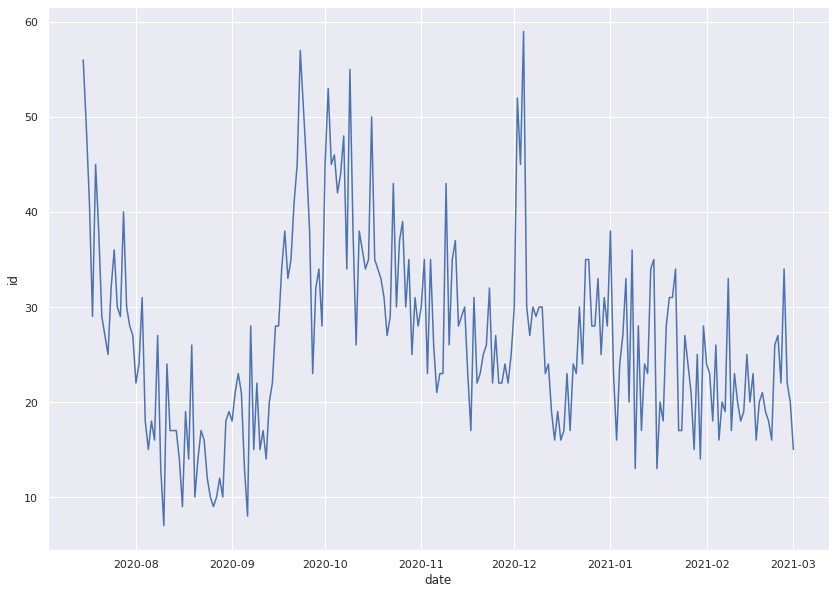

In [54]:
sns.lineplot(data=subset, x=subset.index, y=subset.id)

In [55]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error, mean_absolute_percentage_error


def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 

    """
    rolling_mean = series.rolling(window=window, center=False).mean() #center=True

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

In [56]:
# plotMovingAverage(subset, 4) 

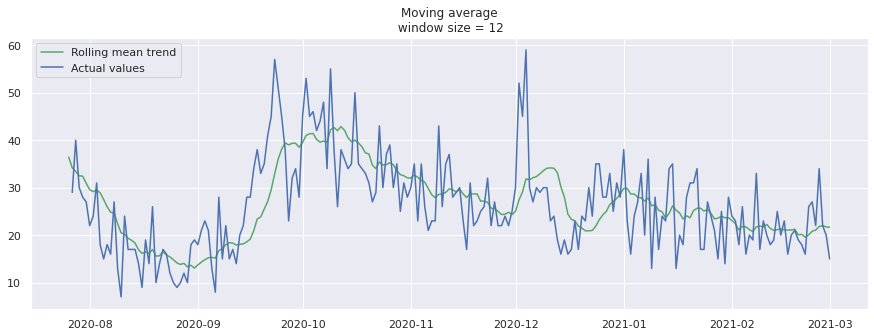

In [57]:
plotMovingAverage(subset, 12) 

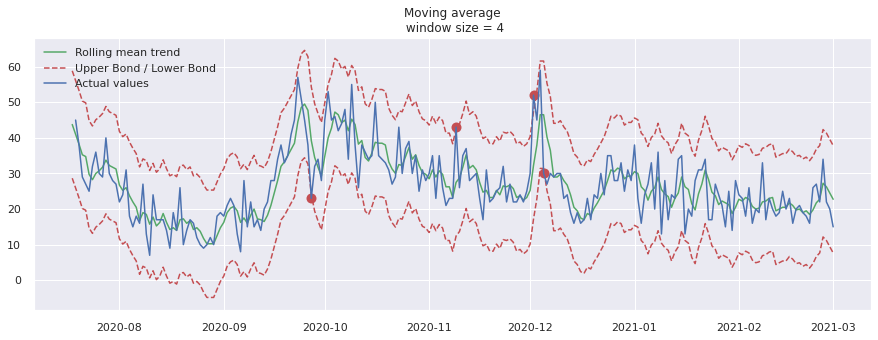

In [189]:
plotMovingAverage(subset, 4, plot_intervals=True, plot_anomalies=True)

plt.savefig(PATH + "March_2021/ts_analysis.png", dpi=300, bbox_inches='tight')

In [59]:
# class HoltWinters:
    
#     """
#     Holt-Winters model with the anomalies detection using Brutlag method
    
#     # series - initial time series
#     # slen - length of a season
#     # alpha, beta, gamma - Holt-Winters model coefficients
#     # n_preds - predictions horizon
#     # scaling_factor - sets the width of the confidence interval by Brutlag (usually takes values from 2 to 3)
    
#     """
    
    
#     def __init__(self, series, slen, alpha, beta, gamma, n_preds, scaling_factor=1.96):
#         self.series = series
#         self.slen = slen
#         self.alpha = alpha
#         self.beta = beta
#         self.gamma = gamma
#         self.n_preds = n_preds
#         self.scaling_factor = scaling_factor
        
        
#     def initial_trend(self):
#         sum = 0.0
#         for i in range(self.slen):
#             sum += float(self.series[i+self.slen] - self.series[i]) / self.slen
#         return sum / self.slen  
    
#     def initial_seasonal_components(self):
#         seasonals = {}
#         season_averages = []
#         n_seasons = int(len(self.series)/self.slen)
#         # let's calculate season averages
#         for j in range(n_seasons):
#             season_averages.append(sum(self.series[self.slen*j:self.slen*j+self.slen])/float(self.slen))
#         # let's calculate initial values
#         for i in range(self.slen):
#             sum_of_vals_over_avg = 0.0
#             for j in range(n_seasons):
#                 sum_of_vals_over_avg += self.series[self.slen*j+i]-season_averages[j]
#             seasonals[i] = sum_of_vals_over_avg/n_seasons
#         return seasonals   

          
#     def triple_exponential_smoothing(self):
#         self.result = []
#         self.Smooth = []
#         self.Season = []
#         self.Trend = []
#         self.PredictedDeviation = []
#         self.UpperBond = []
#         self.LowerBond = []
        
#         seasonals = self.initial_seasonal_components()
        
#         for i in range(len(self.series)+self.n_preds):
#             if i == 0: # components initialization
#                 smooth = self.series[0]
#                 trend = self.initial_trend()
#                 self.result.append(self.series[0])
#                 self.Smooth.append(smooth)
#                 self.Trend.append(trend)
#                 self.Season.append(seasonals[i%self.slen])
                
#                 self.PredictedDeviation.append(0)
                
#                 self.UpperBond.append(self.result[0] + 
#                                       self.scaling_factor * 
#                                       self.PredictedDeviation[0])
                
#                 self.LowerBond.append(self.result[0] - 
#                                       self.scaling_factor * 
#                                       self.PredictedDeviation[0])
#                 continue
                
#             if i >= len(self.series): # predicting
#                 m = i - len(self.series) + 1
#                 self.result.append((smooth + m*trend) + seasonals[i%self.slen])
                
#                 # when predicting we increase uncertainty on each step
#                 self.PredictedDeviation.append(self.PredictedDeviation[-1]*1.01) 
                
#             else:
#                 val = self.series[i]
#                 last_smooth, smooth = smooth, self.alpha*(val-seasonals[i%self.slen]) + (1-self.alpha)*(smooth+trend)
#                 trend = self.beta * (smooth-last_smooth) + (1-self.beta)*trend
#                 seasonals[i%self.slen] = self.gamma*(val-smooth) + (1-self.gamma)*seasonals[i%self.slen]
#                 self.result.append(smooth+trend+seasonals[i%self.slen])
                
#                 # Deviation is calculated according to Brutlag algorithm.
#                 self.PredictedDeviation.append(self.gamma * np.abs(self.series[i] - self.result[i]) 
#                                                + (1-self.gamma)*self.PredictedDeviation[-1])
                     
#             self.UpperBond.append(self.result[-1] + 
#                                   self.scaling_factor * 
#                                   self.PredictedDeviation[-1])

#             self.LowerBond.append(self.result[-1] - 
#                                   self.scaling_factor * 
#                                   self.PredictedDeviation[-1])

#             self.Smooth.append(smooth)
#             self.Trend.append(trend)
#             self.Season.append(seasonals[i%self.slen])

In [60]:
# from sklearn.model_selection import TimeSeriesSplit # you have everything done for you

# def timeseriesCVscore(params, series, loss_function=mean_squared_error, slen=24):
#     """
#         Returns error on CV  
        
#         params - vector of parameters for optimization
#         series - dataset with timeseries
#         slen - season length for Holt-Winters model
#     """
#     # errors array
#     errors = []
    
#     values = series.values
#     alpha, beta, gamma = params
    
#     # set the number of folds for cross-validation
#     tscv = TimeSeriesSplit(n_splits=3) 
    
#     # iterating over folds, train model on each, forecast and calculate error
#     for train, test in tscv.split(values):

#         model = HoltWinters(series=values[train], slen=slen, 
#                             alpha=alpha, beta=beta, gamma=gamma, n_preds=len(test))
#         model.triple_exponential_smoothing()
        
#         predictions = model.result[-len(test):]
#         actual = values[test]
#         error = loss_function(predictions, actual)
#         errors.append(error)
        
#     return np.mean(np.array(errors))

In [61]:
# from scipy.optimize import minimize 

In [62]:
# %%time
# data = subset.id[:-20] # leave some data for testing

# # initializing model parameters alpha, beta and gamma
# x = [0, 0, 0] 

# # Minimizing the loss function 
# opt = minimize(timeseriesCVscore, x0=x, 
#                args=(data, mean_squared_error), 
#                method="TNC", bounds = ((0, 1), (0, 1), (0, 1))
#               )

# # Take optimal values...
# alpha_final, beta_final, gamma_final = opt.x
# print(alpha_final, beta_final, gamma_final)

# # ...and train the model with them, forecasting for the next 50 hours
# model = HoltWinters(data, slen = 24, 
#                     alpha = alpha_final, 
#                     beta = beta_final, 
#                     gamma = gamma_final, 
#                     n_preds = 50, scaling_factor = 3)
# model.triple_exponential_smoothing()

In [63]:
# def plotHoltWinters(series, plot_intervals=False, plot_anomalies=False):
#     """
#         series - dataset with timeseries
#         plot_intervals - show confidence intervals
#         plot_anomalies - show anomalies 
#     """
    
#     plt.figure(figsize=(20, 10))
#     plt.plot(model.result, label = "Model")
#     plt.plot(series.values, label = "Actual")
#     error = mean_absolute_percentage_error(series.values, model.result[:len(series)])
#     plt.title("Mean Absolute Percentage Error: {0:.2f}%".format(error))
    
#     if plot_anomalies:
#         anomalies = np.array([np.NaN]*len(series))
#         anomalies[series.values<model.LowerBond[:len(series)]] = \
#             series.values[series.values<model.LowerBond[:len(series)]]
#         anomalies[series.values>model.UpperBond[:len(series)]] = \
#             series.values[series.values>model.UpperBond[:len(series)]]
#         plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
#     if plot_intervals:
#         plt.plot(model.UpperBond, "r--", alpha=0.5, label = "Up/Low confidence")
#         plt.plot(model.LowerBond, "r--", alpha=0.5)
#         plt.fill_between(x=range(0,len(model.result)), y1=model.UpperBond, 
#                          y2=model.LowerBond, alpha=0.2, color = "grey")    
        
#     plt.vlines(len(series), ymin=min(model.LowerBond), ymax=max(model.UpperBond), linestyles='dashed')
#     plt.axvspan(len(series)-20, len(model.result), alpha=0.3, color='lightgrey')
#     plt.grid(True)
#     plt.axis('tight')
#     plt.legend(loc="best", fontsize=13);

In [64]:
# plotHoltWinters(subset)

In [65]:
# %%time
# data = subset.id[:-20] 
# # slen = 30 # 30-day seasonality

# x = [0, 0, 0] #3 - 0.25

# opt = minimize(timeseriesCVscore, x0=x, 
#                args=(data, mean_absolute_percentage_error), 
#                method="TNC", bounds = ((0, 1), (0, 1), (0, 1))
#               )

# alpha_final, beta_final, gamma_final = opt.x
# print(alpha_final, beta_final, gamma_final)

# model = HoltWinters(data, slen = slen, 
#                     alpha = alpha_final, 
#                     beta = beta_final, 
#                     gamma = gamma_final, 
#                     n_preds = 100, scaling_factor = 3)
# model.triple_exponential_smoothing()

In [66]:
# plotHoltWinters(subset.id)

In [67]:
# from gluonts.dataset.common import ListDataset
# training_data = ListDataset(
#     [{"start": subset.index[0], "target": subset.id[:"2021-04-01"]}],
#     freq = "D"
# )

In [68]:
# training_data.list_data

In [69]:
# from gluonts.model.deepar import DeepAREstimator
# # from gluonts.trainer import Trainer
# from gluonts.mx.trainer import Trainer

# estimator = DeepAREstimator(
#     freq="D", 
#     prediction_length=30, 
#     trainer=Trainer(epochs=35)
# )
# predictor = estimator.train(training_data=training_data)

In [70]:
# from gluonts.dataset.util import to_pandas

# test_data = ListDataset(
#     [{"start": subset.index[0], "target": subset.id[:"2021-04-01"]}],
#     freq = "D"
# )

# for test_entry, forecast in zip(test_data, predictor.predict(test_data)):
#     to_pandas(test_entry).plot(linewidth=2, figsize=(15, 7), label="historical values")
#     forecast.plot(color='g', prediction_intervals=[50.0, 90.0], label="forecast")
    
# plt.legend(loc='upper left')
# plt.grid(axis='x')

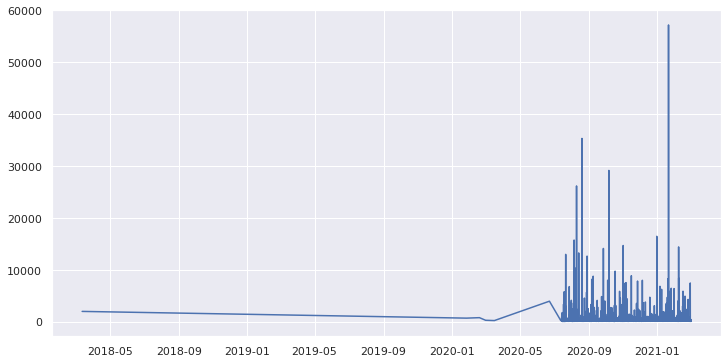

In [71]:
plt.figure(figsize=(12, 6))
plt.plot(df.hitsCount)
plt.grid(True)
plt.show()

In [72]:
# df[df.weekday == 0]

In [73]:
df.groupby(['weekday'])['id'].count().values

array([1003,  888,  790,  806,  898,  839,  953])

In [74]:
df.weekday.value_counts().values

array([1003,  953,  898,  888,  839,  806,  790])

In [75]:
df.weekday.value_counts().sort_index()

Friday       1003
Monday        888
Saturday      790
Sunday        806
Thursday      898
Tuesday       839
Wednesday     953
Name: weekday, dtype: int64

In [76]:
df.groupby(['weekday']).count()

,id,url,author,commentsCount,favoritesCount,hitsCount,isRepost,likes,subsite,title,...,author_avatar_url,symbols,words,images,videos,links,hashtags,exotic_media_type,hour,is_weekend
weekday,,,,,,,,,,,,,,,,,,,,,
Friday,1003,1003,1003,1003,1003,1003,1003,1003,1003,531,...,1003,1003,1003,1003,1003,1003,1003,1003,1003,1003
Monday,888,888,888,888,888,888,888,888,888,469,...,888,888,888,888,888,888,888,888,888,888
Saturday,790,790,790,790,790,790,790,790,790,385,...,790,790,790,790,790,790,790,790,790,790
Sunday,806,806,806,806,806,806,806,806,806,385,...,806,806,806,806,806,806,806,806,806,806
Thursday,898,898,898,898,898,898,898,898,898,455,...,898,898,898,898,898,898,898,898,898,898
Tuesday,839,839,839,839,839,839,839,839,839,447,...,839,839,839,839,839,839,839,839,839,839
Wednesday,953,953,953,953,953,953,953,953,953,469,...,953,953,953,953,953,953,953,953,953,953


<AxesSubplot:>

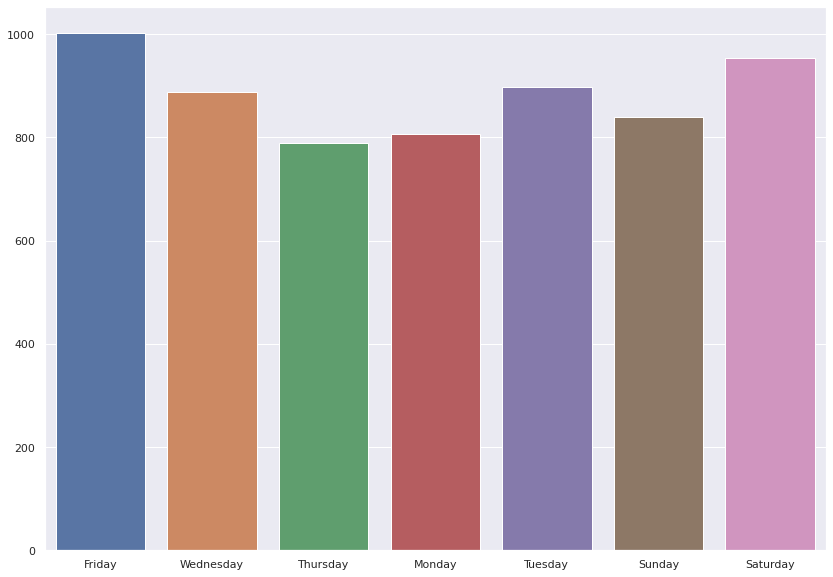

In [77]:
sns.barplot(x=df.weekday.value_counts().index, y=df.groupby(['weekday'])['id'].count().values)

In [78]:
df.reset_index(inplace=True)
df.head()

,date,id,url,author,commentsCount,favoritesCount,hitsCount,isRepost,likes,subsite,...,symbols,words,images,videos,links,hashtags,exotic_media_type,hour,weekday,is_weekend
0,2018-03-12 21:59:15,17110,https://dtf.ru/flood/17110-ne-odin-lish-tip-luny,"{'id': 4876, 'url': 'https://dtf.ru/u/4876-geo...",19,32,1947,True,36,Офтоп,...,11786,1723,42,3,0,[#long],0,21,Monday,0
1,2020-01-26 20:38:21,97215,https://dtf.ru/u/92907-aleksey-fedorov/97215-t...,"{'id': 92907, 'url': 'https://dtf.ru/u/92907-a...",11,47,649,True,56,Алексей Фёдоров,...,206,26,17,0,0,[#anime],0,20,Sunday,1
2,2020-02-18 19:11:46,104163,https://dtf.ru/u/92907-aleksey-fedorov/104163-...,"{'id': 92907, 'url': 'https://dtf.ru/u/92907-a...",39,25,740,True,49,Алексей Фёдоров,...,92,12,32,0,0,"[#anime, #evangelion]",0,19,Tuesday,0
3,2020-02-29 18:25:10,108055,https://dtf.ru/u/92907-aleksey-fedorov/108055-...,"{'id': 92907, 'url': 'https://dtf.ru/u/92907-a...",7,18,236,True,41,Алексей Фёдоров,...,150,14,19,0,1,[#anime],0,18,Saturday,1
4,2020-03-16 10:36:03,113363,https://dtf.ru/u/4810-oleg-kubaneishvili/11336...,"{'id': 4810, 'url': 'https://dtf.ru/u/4810-ole...",5,8,180,True,15,Олег Кубанеишвили,...,4728,689,17,0,0,[],0,10,Monday,0


In [79]:
df.groupby(['isRepost']).agg({'id': "count"})

,id
isRepost,
False,5471
True,706


In [80]:
df.groupby(['isRepost']).agg({'id': "count"})['id']

isRepost
False    5471
True      706
Name: id, dtype: int64

In [81]:
sns.set_theme()
sns.set_palette("husl")

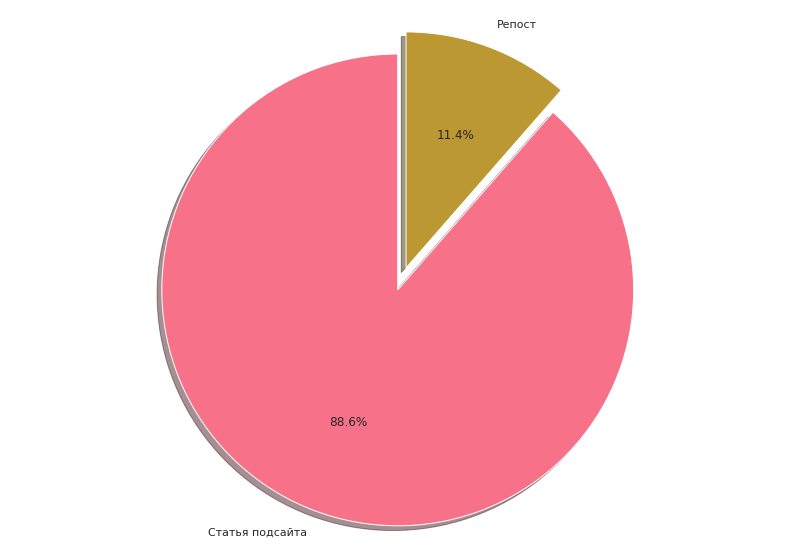

In [82]:
labels = 'Статья подсайта', 'Репост'
sizes = df.groupby(['isRepost']).agg({'id': "count"})['id'].values
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')  
plt.show()

<AxesSubplot:xlabel='symbols'>

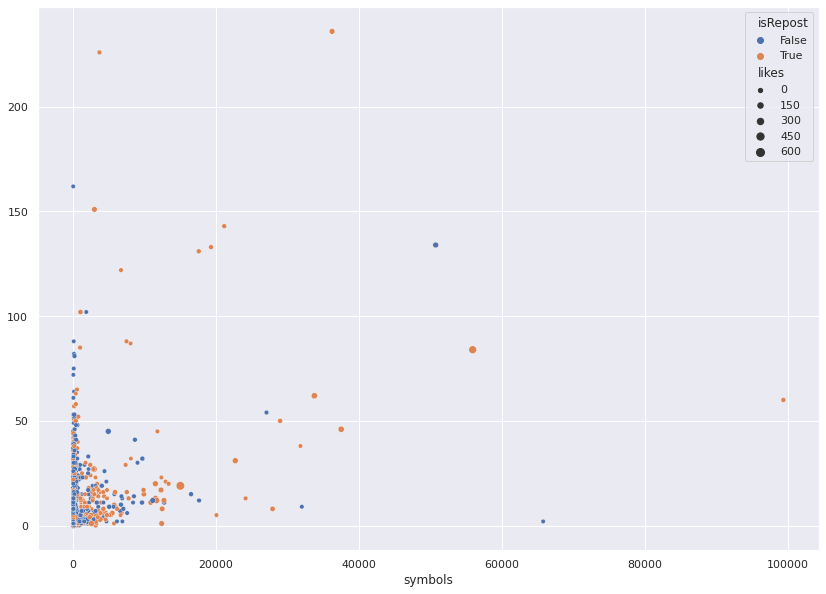

In [83]:
sns.set_theme()
sns.color_palette()

sns.scatterplot(x=df.symbols, size=df.likes, hue='isRepost', 
                y=sum([df.images, df.videos, df.links]), data=df)

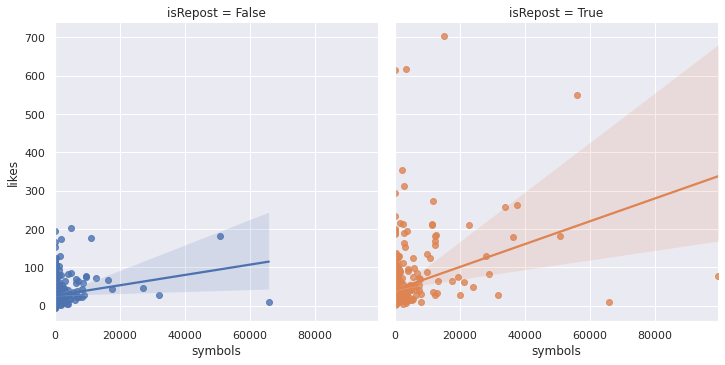

In [84]:
sns.lmplot(data=df, x='symbols', y='likes', col='isRepost', hue='isRepost')

In [85]:
sum((df.isRepost == True) / len(df.isRepost))

0.11429496519346163

In [86]:
tmp = df.groupby(['author_name'])['author_name'].count().sort_values(ascending=False).head(20)

In [87]:
tmp

author_name
Лолег                             753
Layben                            629
Гусь Хмурый                       470
Suzume-sama said OKawaii Koto     312
Diego Paw                         303
Фанат Ани Тейлор-Джой             271
Just No Chill                     237
Pray for Megumin                  231
Хасаги                            152
mindtered                         112
Koda                              109
Oleg Mattewho                      94
Виабу                              90
Алексей Кудрявцев                  80
Анимемания                         76
Saher                              55
deGoose                            53
Некстгенова Элой Плэйстэйшовна     49
Ржобек Пшеждзински                 49
Zerescas                           47
Name: author_name, dtype: int64

https://stackoverflow.com/questions/49820549/labeling-horizontal-barplot-with-values-in-seaborn

https://stackoverflow.com/questions/45946970/displaying-of-values-on-barchart

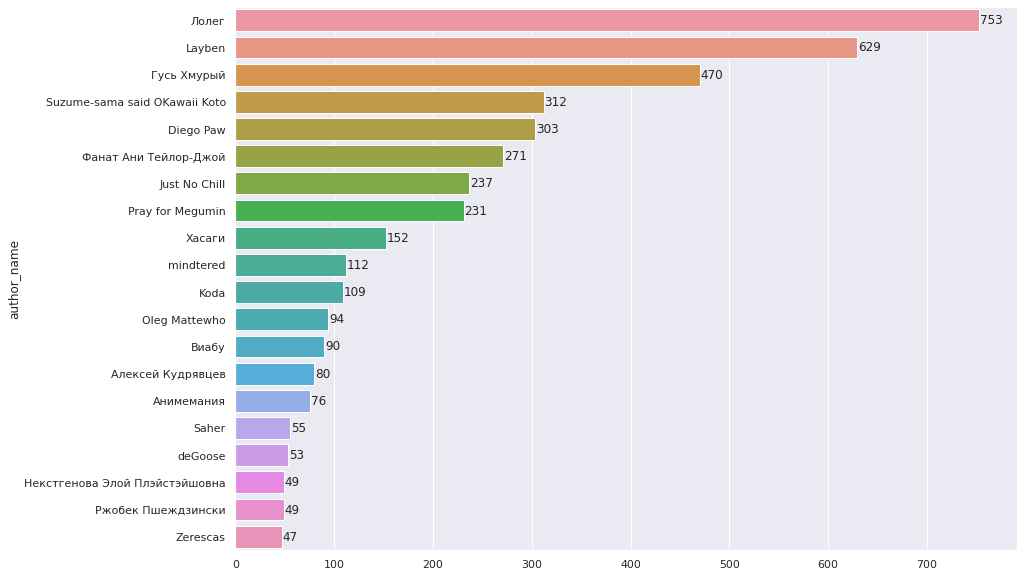

In [88]:
f = sns.barplot(x=tmp.values, y=tmp.index)
ax = f
for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')  # vertical alignment

https://stackoverflow.com/questions/61971090/how-can-i-add-images-to-bars-in-axes-matplotlib

https://stackoverflow.com/questions/40066089/apply-images-to-pyplot-python-bar-graphs

# СУПЕР_ВАЖНО!

```python
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO

labels = ['CW', 'CV', 'GW', 'SX', 'DO']
colors = ['crimson', 'dodgerblue', 'teal', 'limegreen', 'gold']
values = 30 + np.random.randint(5, 20, len(labels)).cumsum()

height = 0.9
plt.barh(y=labels, width=values, height=height, color=colors, align='center')

for i, (label, value) in enumerate(zip(labels, values)):
    # load the image corresponding to label into img
    # with cbook.get_sample_data('ada.png') as image_file:
    #    img = plt.imread(image_file)
    response = requests.get(f'https://www.countryflags.io/{label}/flat/64.png')
    img = plt.imread(BytesIO(response.content))
    plt.imshow(img, extent=[value - 8, value - 2, i - height / 2, i + height / 2], aspect='auto', zorder=2)
plt.xlim(0, max(values) * 1.05)
plt.ylim(-0.5, len(labels) - 0.5)
plt.tight_layout()
plt.show()
```

In [89]:
df.loc[:, 'author']

0       {'id': 4876, 'url': 'https://dtf.ru/u/4876-geo...
1       {'id': 92907, 'url': 'https://dtf.ru/u/92907-a...
2       {'id': 92907, 'url': 'https://dtf.ru/u/92907-a...
3       {'id': 92907, 'url': 'https://dtf.ru/u/92907-a...
4       {'id': 4810, 'url': 'https://dtf.ru/u/4810-ole...
                              ...                        
6172    {'id': 334712, 'url': 'https://dtf.ru/u/334712...
6173    {'id': 334712, 'url': 'https://dtf.ru/u/334712...
6174    {'id': 120739, 'url': 'https://dtf.ru/u/120739...
6175    {'id': 124435, 'url': 'https://dtf.ru/u/124435...
6176    {'id': 154947, 'url': 'https://dtf.ru/u/154947...
Name: author, Length: 6177, dtype: object

In [90]:
# df.loc[:, 'author'][6001] # для timeseries-индекса

In [91]:
df.loc[6001, 'author']

{'id': 286845,
 'url': 'https://dtf.ru/u/286845-digo',
 'name': 'Digo',
 'type': 1,
 'avatar': {'type': 'image',
  'data': {'uuid': '4240025b-b783-5cc1-b5a6-1db7b4477971',
   'width': 588,
   'height': 589,
   'size': 130577,
   'type': 'jpg',
   'color': 'c1c1c1',
   'hash': '46c64d4b4dcb4f37',
   'external_service': []}},
 'avatar_url': 'https://leonardo.osnova.io/4240025b-b783-5cc1-b5a6-1db7b4477971/',
 'is_online': False,
 'is_verified': False,
 'is_subscribed': False}

In [92]:
df.author_avatar_url

0       https://leonardo.osnova.io/57371154-8c4c-5686-...
1       https://leonardo.osnova.io/fd7e4878-7785-5d8b-...
2       https://leonardo.osnova.io/fd7e4878-7785-5d8b-...
3       https://leonardo.osnova.io/fd7e4878-7785-5d8b-...
4       https://leonardo.osnova.io/528babea-0dfc-444b-...
                              ...                        
6172    https://leonardo.osnova.io/02293c89-0cd2-5168-...
6173    https://leonardo.osnova.io/02293c89-0cd2-5168-...
6174    https://leonardo.osnova.io/7df667af-003c-502d-...
6175    https://leonardo.osnova.io/1315d174-7208-5a30-...
6176    https://leonardo.osnova.io/c29d8c44-0073-48cc-...
Name: author_avatar_url, Length: 6177, dtype: object

In [93]:
tmp = df.groupby(['author_avatar_url'])[['id', ]].count().sort_values(by="id", ascending=False).head(20) #\
#.count().sort_values(ascending=False).head(20)
# by="author_name"
tmp

,id
author_avatar_url,
https://leonardo.osnova.io/b6f745b6-3963-56d5-9c3c-2d6327a0dc53/,753
https://leonardo.osnova.io/7fec5e46-2507-5dcd-9d6d-06827fe1ec5b/,629
https://leonardo.osnova.io/8fd51f8a-d2eb-2130-8b66-92029cde17c1/,470
https://leonardo.osnova.io/1315d174-7208-5a30-8ccf-fa36e74ba0b0/,312
https://leonardo.osnova.io/7df667af-003c-502d-a672-56ab2918c9a4/,303
https://leonardo.osnova.io/8cc8cb1e-f454-54f3-a19f-1622a11a6cd2/,271
https://leonardo.osnova.io/199de206-2dfc-57ee-b387-1df29e145d6c/,237
https://leonardo.osnova.io/99677e0a-6adb-5b89-8177-9cd3acd32185/,231
https://leonardo.osnova.io/d1119c29-41a3-5997-96f3-628c0ee5296a/,152


In [94]:
tmp.index

Index(['https://leonardo.osnova.io/b6f745b6-3963-56d5-9c3c-2d6327a0dc53/',
       'https://leonardo.osnova.io/7fec5e46-2507-5dcd-9d6d-06827fe1ec5b/',
       'https://leonardo.osnova.io/8fd51f8a-d2eb-2130-8b66-92029cde17c1/',
       'https://leonardo.osnova.io/1315d174-7208-5a30-8ccf-fa36e74ba0b0/',
       'https://leonardo.osnova.io/7df667af-003c-502d-a672-56ab2918c9a4/',
       'https://leonardo.osnova.io/8cc8cb1e-f454-54f3-a19f-1622a11a6cd2/',
       'https://leonardo.osnova.io/199de206-2dfc-57ee-b387-1df29e145d6c/',
       'https://leonardo.osnova.io/99677e0a-6adb-5b89-8177-9cd3acd32185/',
       'https://leonardo.osnova.io/d1119c29-41a3-5997-96f3-628c0ee5296a/',
       'https://leonardo.osnova.io/a887eec3-527b-5d5f-96a2-5ab87fccb3e7/',
       'https://leonardo.osnova.io/c29d8c44-0073-48cc-10f2-7d175ab7d94c/',
       'https://leonardo.osnova.io/fe59528c-8e0d-52fc-830f-f675e2860162/',
       'https://leonardo.osnova.io/87970ef6-a669-5696-b199-2907f0ec4593/',
       'https://leonardo.

In [95]:
# labels
# values

# МЕГА-ВАЖНО!

https://stackoverflow.com/questions/61971090/how-can-i-add-images-to-bars-in-axes-matplotlib

https://stackoverflow.com/questions/7391945/how-do-i-read-image-data-from-a-url-in-python

In [96]:
# Первый, неудачный вариант

# import requests
# from PIL import Image
# from io import BytesIO

# labels = tmp.index[:5]
# colors = ['tan', 'peru', 'grey', 'orchid', 'darkred']
# values = tmp.values.flatten()[:5]

# height = 0.9
# plt.barh(y=tmp.index[:5], width=tmp.values.flatten()[:5], height=height, color=colors, align='center')

# for i, (label, value) in enumerate(zip(labels, values)):
#     im = Image.open(requests.get(label, stream=True).raw)
#     plt.imshow(im, extent=[value - 150, value - 20, i - height / 2.5, i + height / 2.5], aspect='auto', zorder=2)
       
    
# plt.xlim(0, max(values) * 1.05)
# plt.ylim(-0.5, len(labels) - 0.5)
# plt.tight_layout()
# plt.show()

https://stackoverflow.com/questions/32059397/pandas-groupby-without-turning-grouped-by-column-into-index

In [97]:
tmp_2 = df.groupby(['author_name','author_avatar_url'], as_index=False).count() \
.sort_values(by="id", ascending=False).head(20).iloc[:, [0,1,3]]
tmp_2

,author_name,author_avatar_url,id
315,Лолег,https://leonardo.osnova.io/b6f745b6-3963-56d5-...,753
104,Layben,https://leonardo.osnova.io/7fec5e46-2507-5dcd-...,629
277,Гусь Хмурый,https://leonardo.osnova.io/8fd51f8a-d2eb-2130-...,470
172,Suzume-sama said OKawaii Koto,https://leonardo.osnova.io/1315d174-7208-5a30-...,312
47,Diego Paw,https://leonardo.osnova.io/7df667af-003c-502d-...,303
371,Фанат Ани Тейлор-Джой,https://leonardo.osnova.io/8cc8cb1e-f454-54f3-...,271
90,Just No Chill,https://leonardo.osnova.io/199de206-2dfc-57ee-...,237
142,Pray for Megumin,https://leonardo.osnova.io/99677e0a-6adb-5b89-...,231
374,Хасаги,https://leonardo.osnova.io/d1119c29-41a3-5997-...,152
209,mindtered,https://leonardo.osnova.io/a887eec3-527b-5d5f-...,112


In [98]:
tmp_2.author_name

315                             Лолег
104                            Layben
277                       Гусь Хмурый
172     Suzume-sama said OKawaii Koto
47                          Diego Paw
371             Фанат Ани Тейлор-Джой
90                      Just No Chill
142                  Pray for Megumin
374                            Хасаги
209                         mindtered
101                              Koda
137                     Oleg Mattewho
261                             Виабу
236                 Алексей Кудрявцев
248                        Анимемания
152                             Saher
200                           deGoose
334    Некстгенова Элой Плэйстэйшовна
353                Ржобек Пшеждзински
190                          Zerescas
Name: author_name, dtype: object

In [99]:
tmp_2.id[:5][::-1]

47     303
172    312
277    470
104    629
315    753
Name: id, dtype: int64

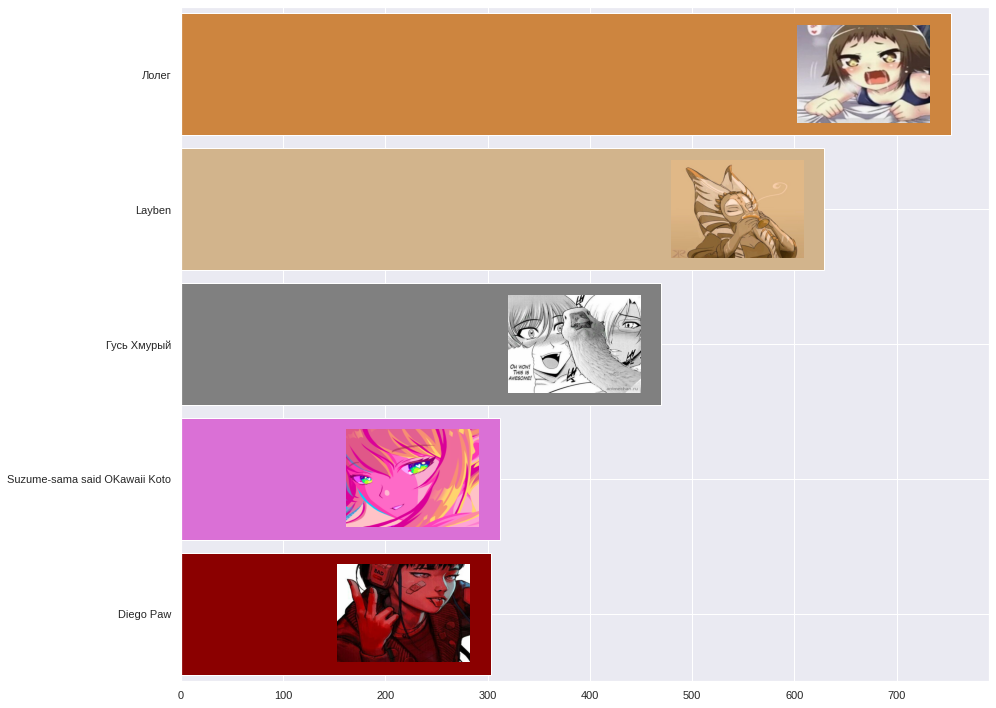

In [100]:
import requests
from PIL import Image
from io import BytesIO

labels = tmp_2.author_avatar_url[:5][::-1]
colors = ['peru', 'tan', 'grey', 'orchid', 'darkred'][::-1]
values = tmp_2.id[:5][::-1] #.flatten()[:5]

height = 0.9
plt.barh(y=tmp_2.author_name[:5][::-1], width=tmp_2.id[:5][::-1], height=height, color=colors, align='center')

for i, (label, value) in enumerate(zip(labels, values)):
    im = Image.open(requests.get(label, stream=True).raw)
    plt.imshow(im, extent=[value - 150, value - 20, i - height / 2.5, i + height / 2.5], aspect='auto', zorder=2)

plt.style.use('seaborn')    
plt.xlim(0, max(values) * 1.05)
plt.ylim(-0.5, len(labels) - 0.5)
plt.tight_layout()
plt.show()

In [101]:
ax.patches

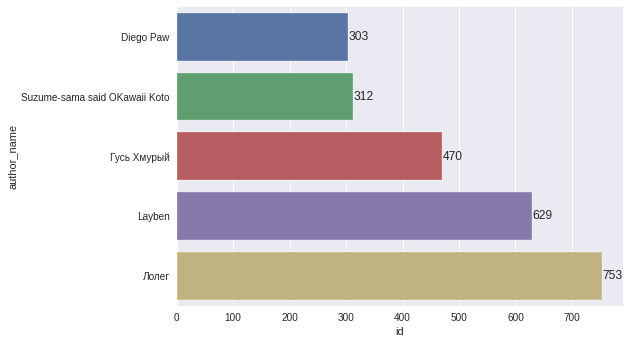

In [102]:
labels = tmp_2.author_avatar_url[:5][::-1]
colors = ['peru', 'tan', 'grey', 'orchid', 'darkred'][::-1]
values = tmp_2.id[:5][::-1] #.flatten()[:5]

height = 0.9
f = sns.barplot(y=tmp_2.author_name[:5][::-1], x=tmp_2.id[:5][::-1])
ax = f

for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')  # vertical alignment

# for i, (label, value) in enumerate(zip(labels, values)):
#     im = Image.open(requests.get(label, stream=True).raw)
#     plt.imshow(im, extent=[value - 150, value - 20, i - height / 2.5, i + height / 2.5], aspect='auto', zorder=2)
       
    
# plt.xlim(0, max(values) * 1.05)
# plt.ylim(-0.5, len(labels) - 0.5)
# plt.tight_layout()
# plt.show()

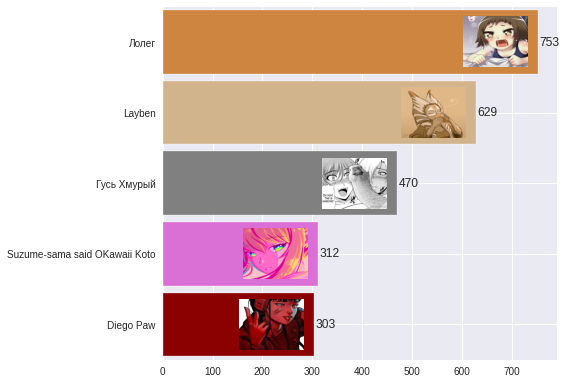

In [103]:
import requests
from PIL import Image
from io import BytesIO

labels = tmp_2.author_avatar_url[:5][::-1]
colors = ['peru', 'tan', 'grey', 'orchid', 'darkred'][::-1]
values = tmp_2.id[:5][::-1] 

height = 0.9
plt.barh(y=tmp_2.author_name[:5][::-1], width=tmp_2.id[:5][::-1], height=height, color=colors, align='center')

for i, (label, value) in enumerate(zip(labels, values)):
    im = Image.open(requests.get(label, stream=True).raw)
    plt.imshow(im, extent=[value - 150, value - 20, i - height / 2.5, i + height / 2.5], aspect='auto', zorder=2)
    plt.text(value + 3, i, '{:1.0f}'.format(value), ha = 'left', va = 'center')

    
plt.xlim(0, max(values) * 1.05)
plt.ylim(-0.5, len(labels) - 0.5)
plt.tight_layout()
plt.show()

In [104]:
df.groupby(['author_name']).agg({'id': 'count', 'likes': ['max', 'sum']}).sort_values(by=("id",'count'), ascending=False)

id likes       
                              count   max    sum
author_name                                     
Лолег                           753   130  22041
Layben                          629    90  12460
Гусь Хмурый                     470    99  13566
Suzume-sama said OKawaii Koto   312   114  11428
Diego Paw                       303   123   6836
...                             ...   ...    ...
Mix                               1     8      8
Mikhail                           1    40     40
ManInGlasses                      1    91     91
Lucius Olden                      1    13     13
💱                                 1    10     10

[386 rows x 3 columns]

In [105]:
df.columns

Index(['date', 'id', 'url', 'author', 'commentsCount', 'favoritesCount',
       'hitsCount', 'isRepost', 'likes', 'subsite', 'title', 'type', 'blocks',
       'repost', 'stackedRepostsAuthors', 'media_content_types', 'author_name',
       'author_type', 'author_avatar_url', 'symbols', 'words', 'images',
       'videos', 'links', 'hashtags', 'exotic_media_type', 'hour', 'weekday',
       'is_weekend'],
      dtype='object')

<AxesSubplot:>

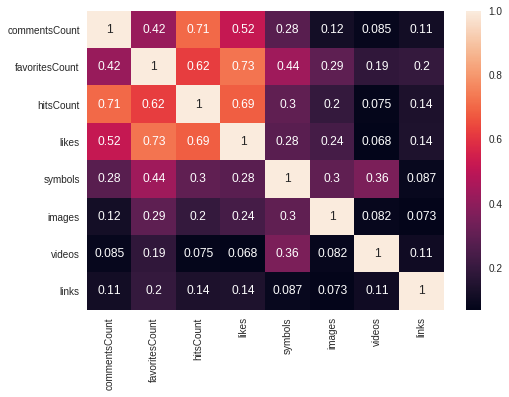

In [106]:
sns.heatmap(df.loc[:, ['commentsCount', 'favoritesCount', 'hitsCount', 
                       'likes', 'symbols', 'images', 'videos', 'links']].corr(), annot=True)

In [107]:
df.groupby(['author_name', 'isRepost']).agg({'id': 'count', 'likes': ['max', 'sum']}).sort_values(by=("id",'count'), ascending=False)

id likes       
                               count   max    sum
author_name           isRepost                   
Лолег                 False      742   130  21664
Layben                False      623    90  12287
Гусь Хмурый           False      466    99  13349
Diego Paw             False      288   123   6517
Фанат Ани Тейлор-Джой False      252   153   5803
...                              ...   ...    ...
StupidMaronGuy        True         1    17     17
Strapony              False        1    64     64
Spike Shpigel         False        1    12     12
Some Dude             False        1    14     14
💱                     False        1    10     10

[472 rows x 3 columns]

<AxesSubplot:xlabel='symbols'>

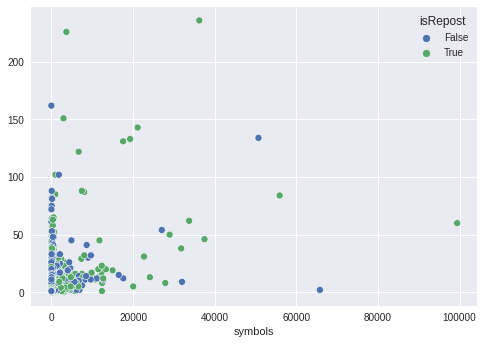

In [108]:
sns.scatterplot(x=df.symbols, y=sum([df.images, df.videos, df.links]), hue='isRepost', data=df)

<AxesSubplot:xlabel='commentsCount', ylabel='Count'>

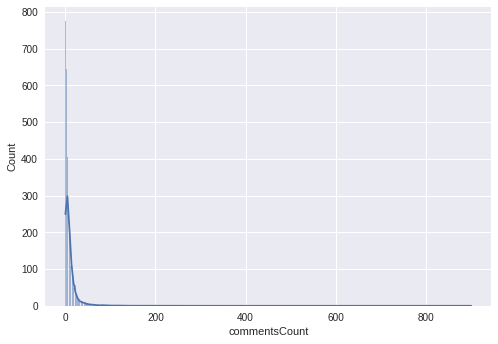

In [109]:
sns.histplot(x = df.commentsCount, kde=True)

<AxesSubplot:xlabel='hitsCount', ylabel='Count'>

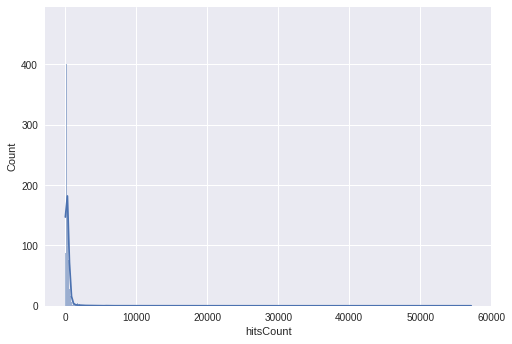

In [110]:
sns.histplot(df.hitsCount, kde=True)

<AxesSubplot:xlabel='likes', ylabel='Count'>

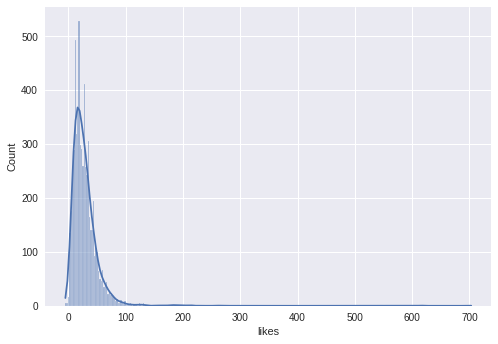

In [111]:
sns.histplot(df.likes, kde=True)

<AxesSubplot:xlabel='isRepost', ylabel='likes'>

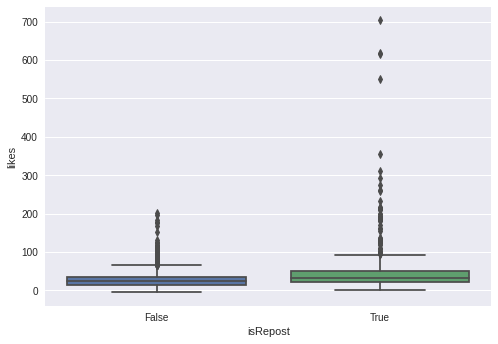

In [112]:
sns.boxplot(data=df, x="isRepost", y="likes")

In [113]:
a = df.groupby(['author_name']).agg({'id': 'count'})
a[a['id'] > 1].sort_values(by='id', ascending=False)

,id
author_name,
Лолег,753
Layben,629
Гусь Хмурый,470
Suzume-sama said OKawaii Koto,312
Diego Paw,303
...,...
Nameless One,2
"Нагнеталка, пусти кота",2
Lonely Vasyan,2


In [114]:
a[a['id'] > 100].index

Index(['Diego Paw', 'Just No Chill', 'Koda', 'Layben', 'Pray for Megumin',
       'Suzume-sama said OKawaii Koto', 'mindtered', 'Гусь Хмурый', 'Лолег',
       'Фанат Ани Тейлор-Джой', 'Хасаги'],
      dtype='object', name='author_name')

In [115]:
tmp = df.groupby(['author_name']).agg({'id': 'count'})

In [116]:
# sns.boxplot(data=df, y="author_name", x="likes")

<AxesSubplot:ylabel='likes'>

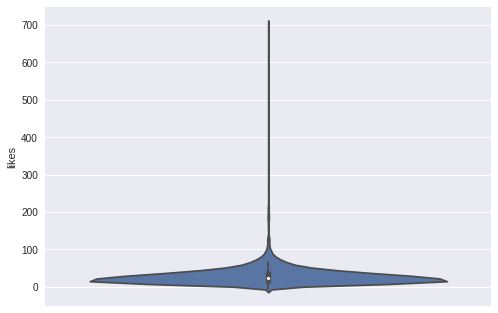

In [117]:
sns.violinplot(y=df.likes)

In [118]:
from plotnine import *
from plotnine.data import *

https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_violin.html?highlight=violin#violins-boxes-points-and-lines

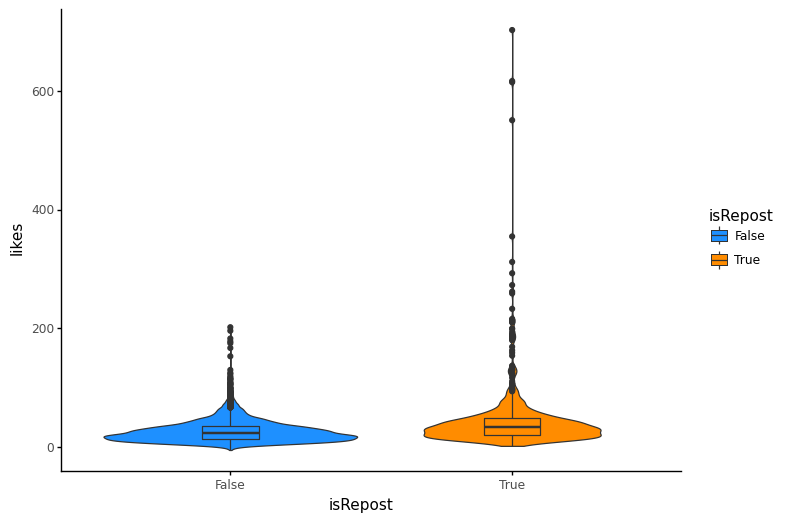

<ggplot: (8771247673682)>

In [119]:
(ggplot(df, aes(x=df.isRepost, y=df.likes, fill=df.isRepost)) + geom_violin(show_legend=False) + geom_boxplot(width = .2)
+ scale_fill_manual(values=['dodgerblue', 'darkorange'])
+ theme_classic()
+ theme(figure_size=(8, 6))
)

In [120]:
df[df.title == 'Статья удалена'].shape[0]

94

In [121]:
df[df.title == 'Статья удалена'].author_name.unique()

array(['Поздний алмаз', 'Каменный Валера', 'Телефонный дебаркадер',
       'Модный Филипп', 'Аккуратный ящик', 'Системный щит',
       'Экспериментальный Женя', 'Тупой бас', 'Любимый бинокль',
       'Оборонный Никита', 'Ключевой чувак'], dtype=object)

In [122]:
df[sum([df.images, df.videos, df.links]) == 0].symbols.unique()

array([  43,  121,   38,   14,   18,   76,    0,  455,  155,   82,   11,
        413,  527,   97,  852,  102, 3152,  220,   73,  306,  129,  212,
         44,  238,  537,  125,  152,  122])

In [123]:
sum([df.images, df.videos, df.links]).value_counts(normalize=True, sort=True)

1      0.578112
2      0.087259
4      0.044520
3      0.040473
5      0.034321
         ...   
42     0.000162
54     0.000162
62     0.000162
82     0.000162
151    0.000162
Length: 80, dtype: float64

In [124]:
df.shape[0]

6177

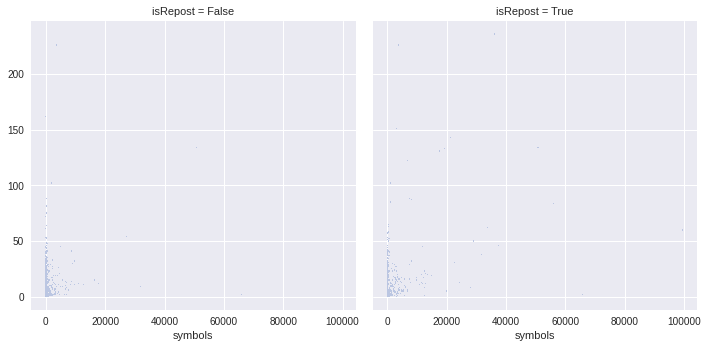

In [125]:
sns.displot(x=df.symbols, y=sum([df.images, df.videos, df.links]), col='isRepost', data=df)

<AxesSubplot:xlabel='symbols'>

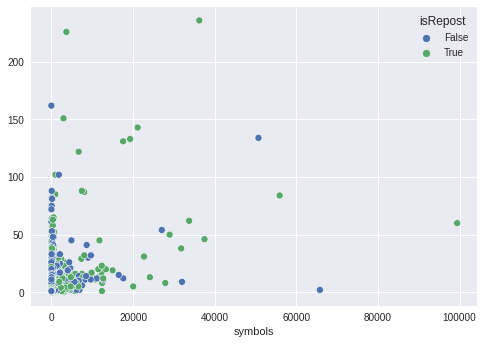

In [126]:
sns.scatterplot(x=df.symbols, y=sum([df.images, df.videos, df.links]), hue='isRepost', data=df)

<AxesSubplot:ylabel='Count'>

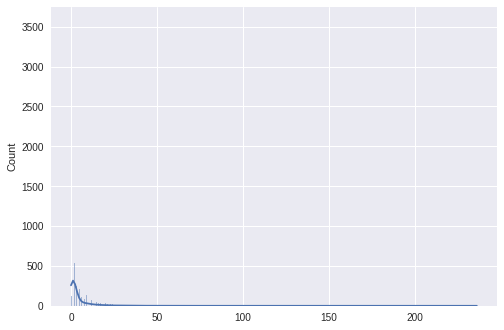

In [127]:
sns.histplot(data=df, x=sum([df.images, df.videos, df.links]), kde=True)

<AxesSubplot:xlabel='likes', ylabel='Count'>

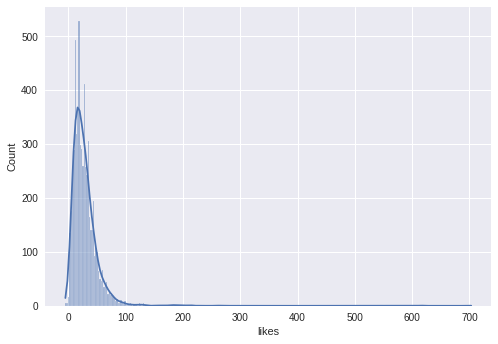

In [128]:
sns.histplot(data=df, x=df.likes, kde=True)#, bins=70)

https://stackoverflow.com/questions/62884183/trying-to-add-a-colorbar-to-a-seaborn-scatterplot

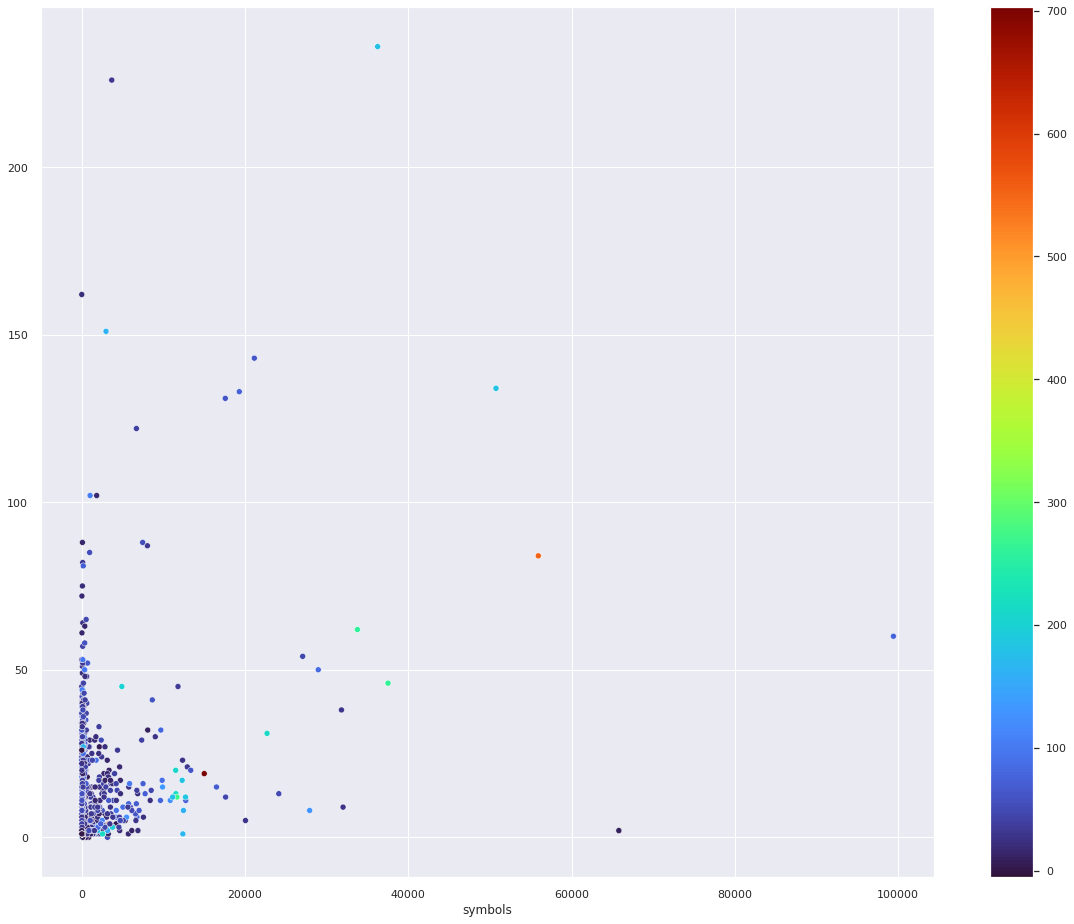

In [129]:
plt.rcParams["figure.figsize"] = [20, 16]

import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
ax = sns.scatterplot(x=df.symbols, y=sum([df.images, df.videos, df.links]), hue=df.likes,
                     palette='turbo', data=df)

norm = plt.Normalize(df.likes.min(), df.likes.max())
sm = plt.cm.ScalarMappable(cmap="turbo", norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
ax.get_legend().remove()
ax.figure.colorbar(sm)

plt.show()

In [130]:
X = np.array([df.symbols, sum([df.images, df.videos, df.links])]).T
X

array([[11786,    45],
       [  206,    17],
       [   92,    32],
       ...,
       [    0,     1],
       [  106,     1],
       [    0,     1]])

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

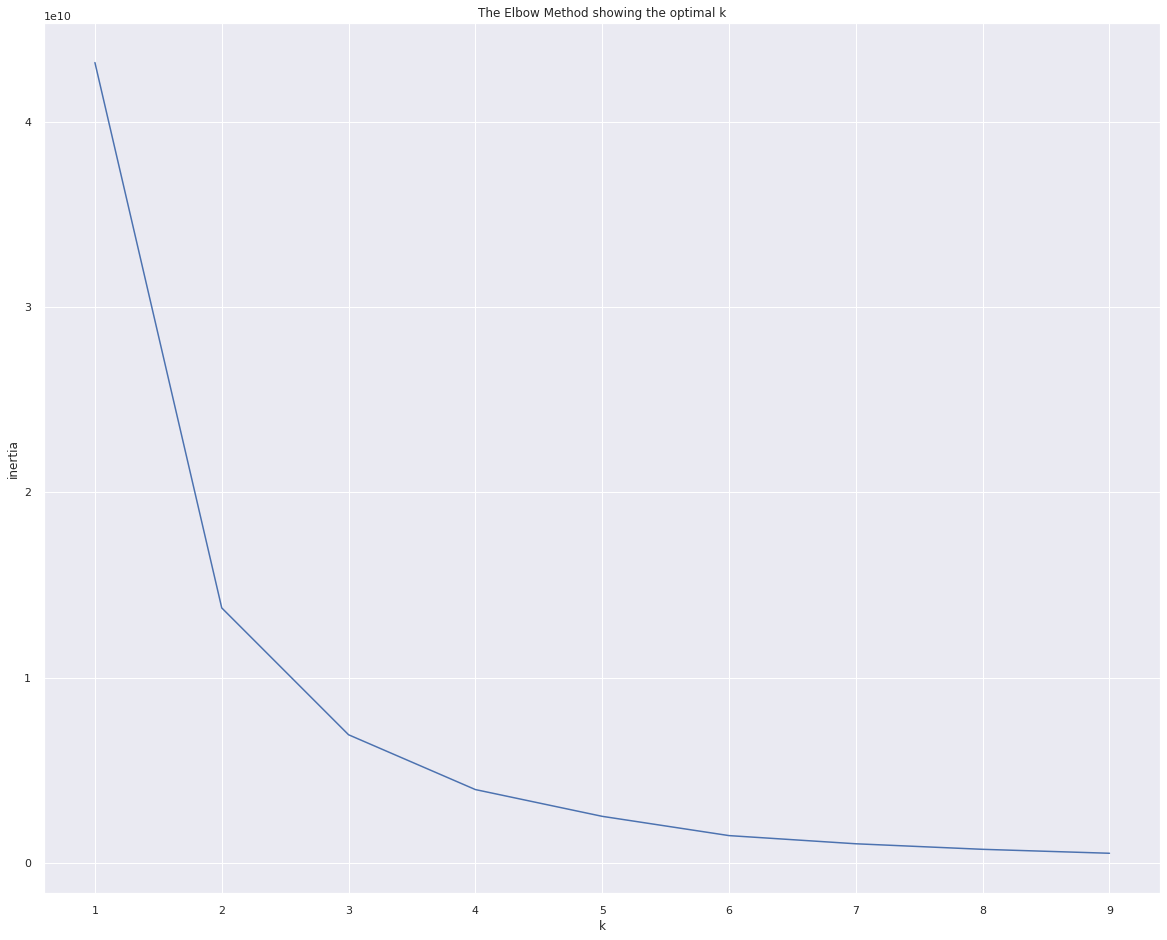

In [131]:
from sklearn.cluster import KMeans
from sklearn import metrics

inertia = []
k = range(1, 10)
for k_i in k:
    km = KMeans(n_clusters=k_i).fit(X)
    km.fit(X)
    inertia.append(km.inertia_)
    
plt.plot(k, inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('The Elbow Method showing the optimal k')

[0.9884075209876034, 0.9782544227726709, 0.9612109364416033, 0.9612643927099478, 0.9434674932184075, 0.9303817223080556, 0.9298444286440929, 0.929991118789375]


Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

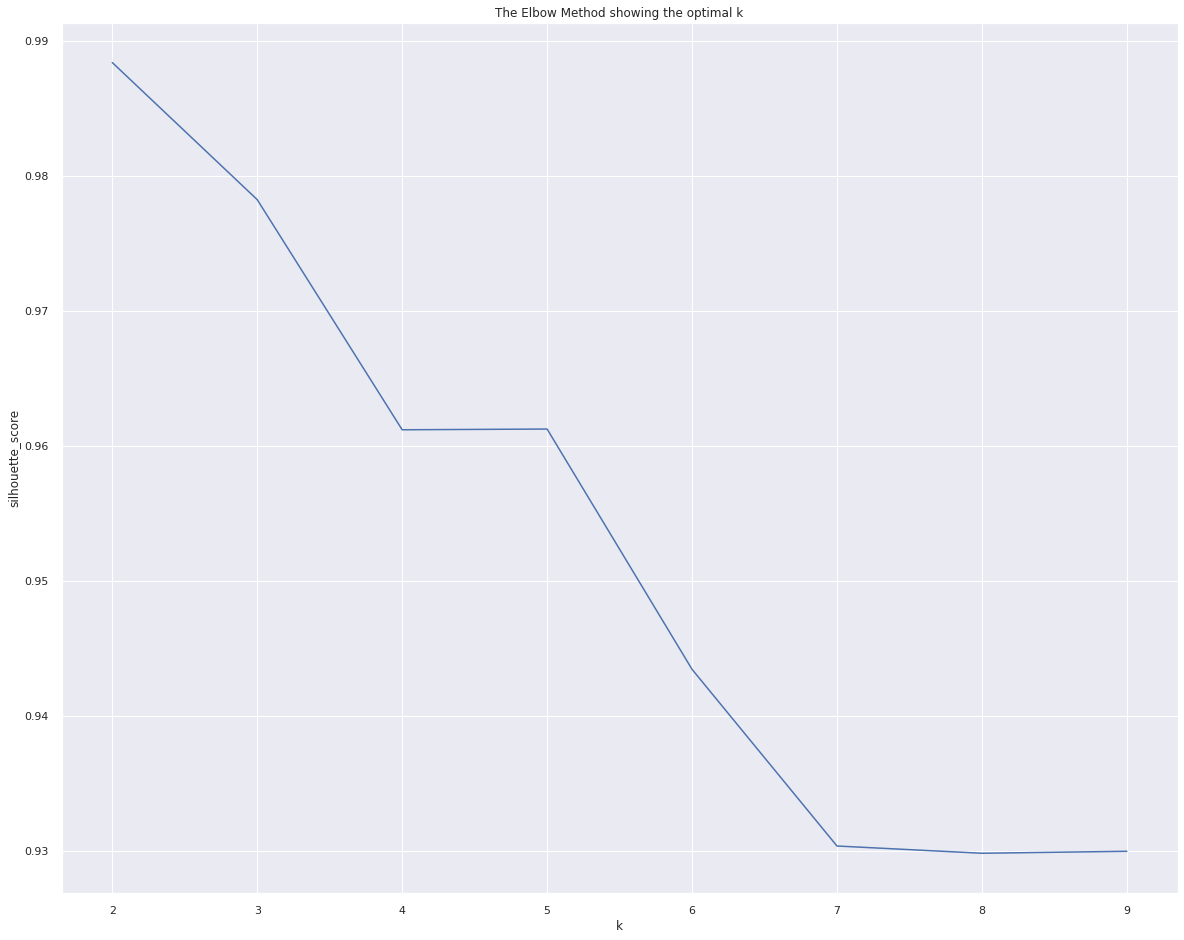

In [132]:
from sklearn.metrics import silhouette_score
inertia = []
k = range(2, 10)
for k_i in k:
    km = KMeans(n_clusters=k_i).fit(X)
    km.fit(X)
    inertia.append(silhouette_score(X, km.labels_))

print(inertia)
    
plt.plot(k, inertia)
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('The Elbow Method showing the optimal k')

<AxesSubplot:>

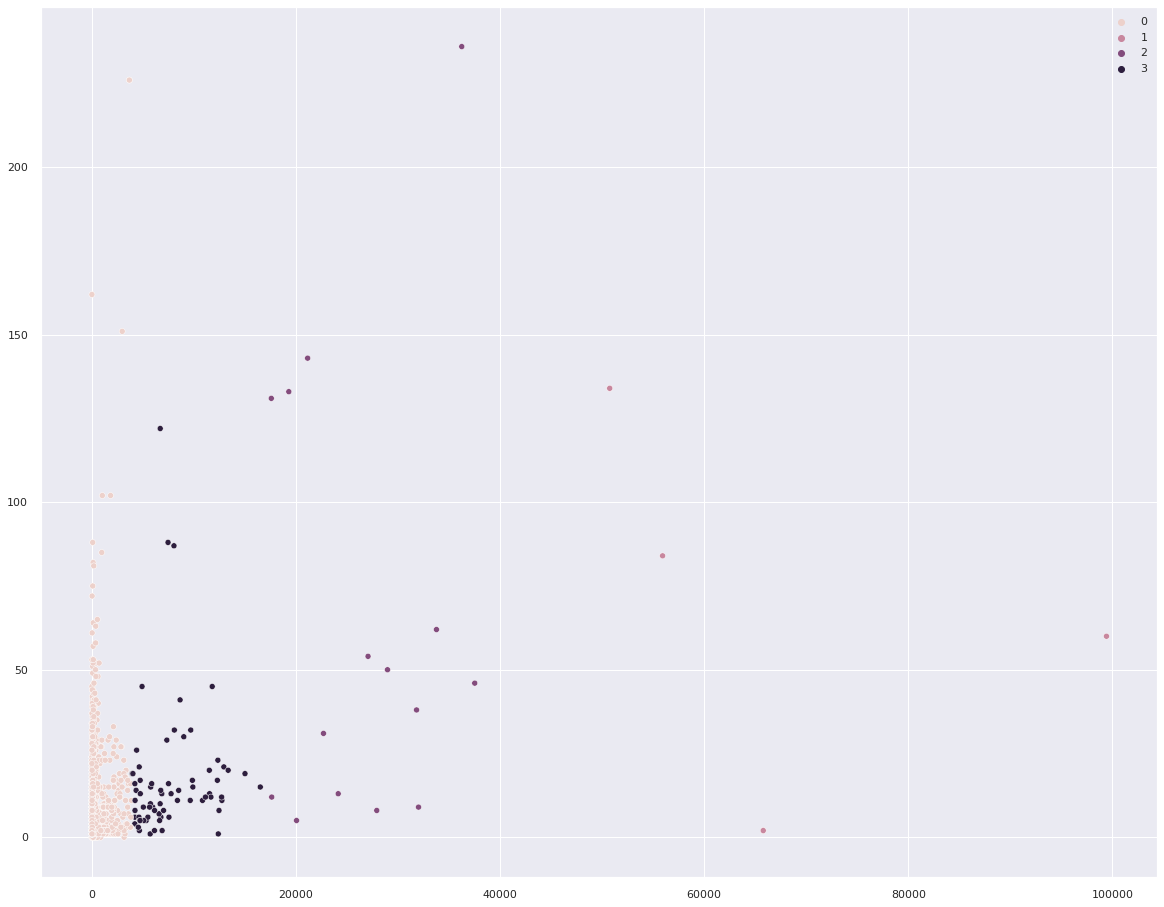

In [133]:
kmeans = KMeans(n_clusters=4, random_state=10)
y_pred = kmeans.fit_predict(X)

# Plot the prediction
# plt.scatter(X[:,0], X[:,1], c=y_pred)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y_pred)

In [134]:
from sklearn.cluster import DBSCAN

X = np.array([df.symbols, sum([df.images, df.videos, df.links])]).T
X

array([[11786,    45],
       [  206,    17],
       [   92,    32],
       ...,
       [    0,     1],
       [  106,     1],
       [    0,     1]])

[-1  0  1  2  3]


<AxesSubplot:>

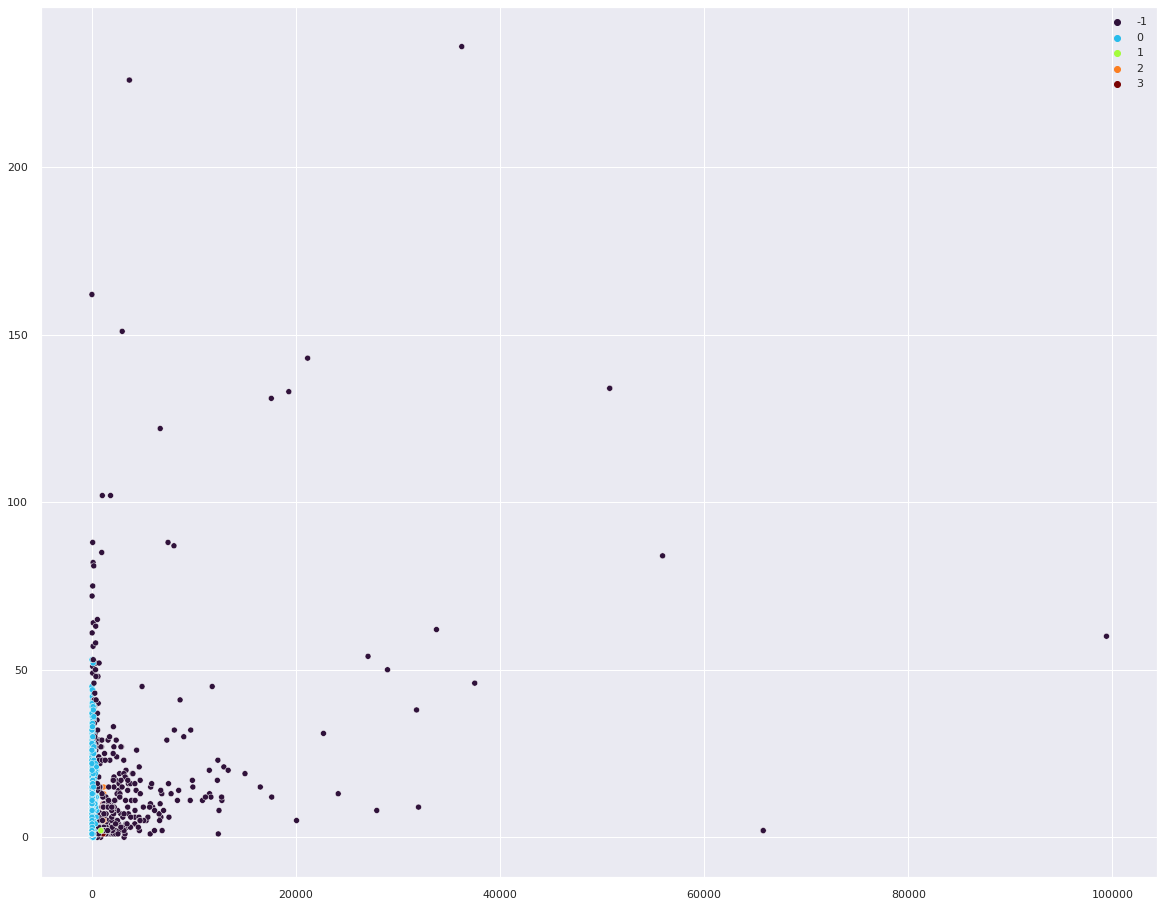

In [135]:
clustering = DBSCAN(eps=15, min_samples=10)
y_pred = clustering.fit_predict(X)

plt.rcParams["figure.figsize"] = [20, 16]
print(np.unique(y_pred))

sns.scatterplot(x=X[:,0], y=X[:,1], hue=y_pred, palette='turbo')

### DBScan не работает при различных плотностях кластеров. Собственно это и можно наблюдать.

In [136]:
np.unique(y_pred)

array([-1,  0,  1,  2,  3])

In [152]:
from sklearn.cluster import SpectralClustering

X = np.array([df.symbols, sum([df.images, df.videos, df.links])]).T
X

array([[11786,    45],
       [  206,    17],
       [   92,    32],
       ...,
       [    0,     1],
       [  106,     1],
       [    0,     1]])

Очень долго работало и не доработало до конца. Нужно попробовать в колабе.

In [138]:
# clustering = SpectralClustering(n_clusters=5, assign_labels="discretize", affinity='rbf')
# y_pred = clustering.fit_predict(X)

# plt.rcParams["figure.figsize"] = [20, 16]
# print(np.unique(y_pred))

# sns.scatterplot(x=X[:,0], y=X[:,1], hue=y_pred, palette='turbo')

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]
number of estimated clusters : 60


<AxesSubplot:>

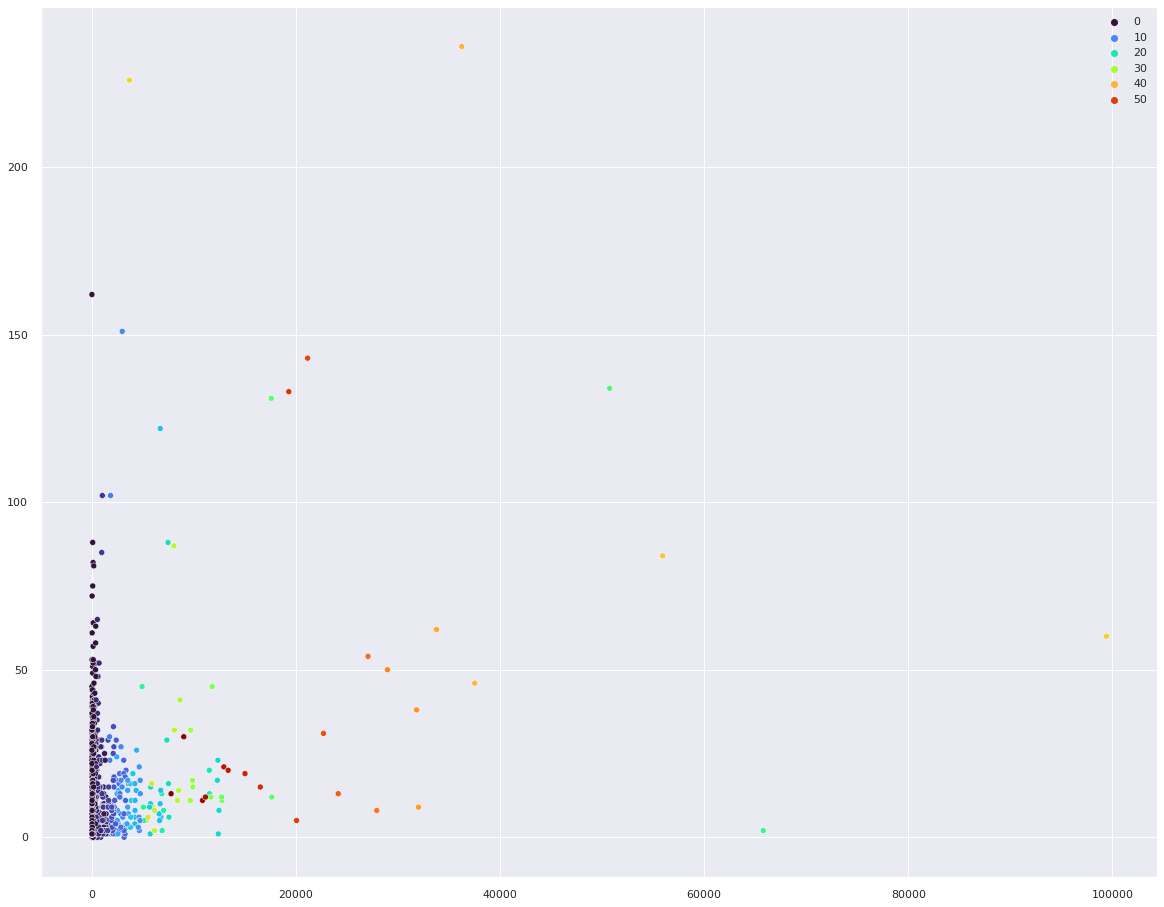

In [153]:
from sklearn import cluster
from sklearn.cluster import MeanShift

bandwidth = cluster.estimate_bandwidth(X, quantile=0.2, n_samples=50)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
y_pred = ms.fit_predict(X)

plt.rcParams["figure.figsize"] = [20, 16]
print(np.unique(y_pred))

labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

sns.scatterplot(x=X[:,0], y=X[:,1], hue=y_pred, palette='turbo')

# from itertools import cycle
# colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
# for k, col in zip(range(n_clusters_), colors):
#     my_members = labels == k
#     cluster_center = cluster_centers[k]
#     plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
#     plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
#              markeredgecolor='k', markersize=14)
# plt.title('Estimated number of clusters: %d' % n_clusters_)
# plt.show()

Почему нормально не сошлись алгоритмы кластеризации? 
#### Потому что я сделал чушь. Основные метрики использованных алгоритмов - плотность и расстояние. Учитывая, что я не нормализировал и не стандартизировал входные данные - алгоритмы просто не могли нормально сойтись. 

Слишком высокая дисперсия по абсциссе, по отношению к дисперсию по ординате. 
#### НОРМАЛИЗАЦИЯ НУЖНА ОБЯЗАТЕЛЬНО!

Для DBSCAN важны параметры эпсилон и н_сэмплс - т. е. эпсилон-окрестность точки и количество точек, входящих в эту окрестность, которые необходимы для определения их принадлежности к одному кластеру. 

Следует также попробовать иерархическую кластеризацию на данных. 

In [154]:
from sklearn import preprocessing

In [155]:
from sklearn.preprocessing import StandardScaler

In [156]:
X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[ 4.333536  ,  3.88114303],
       [-0.04630023,  1.19476418],
       [-0.08941778,  2.63389571],
       ...,
       [-0.12421441, -0.34030945],
       [-0.08412265, -0.34030945],
       [-0.12421441, -0.34030945]])

[-1  0  1  2]


<AxesSubplot:>

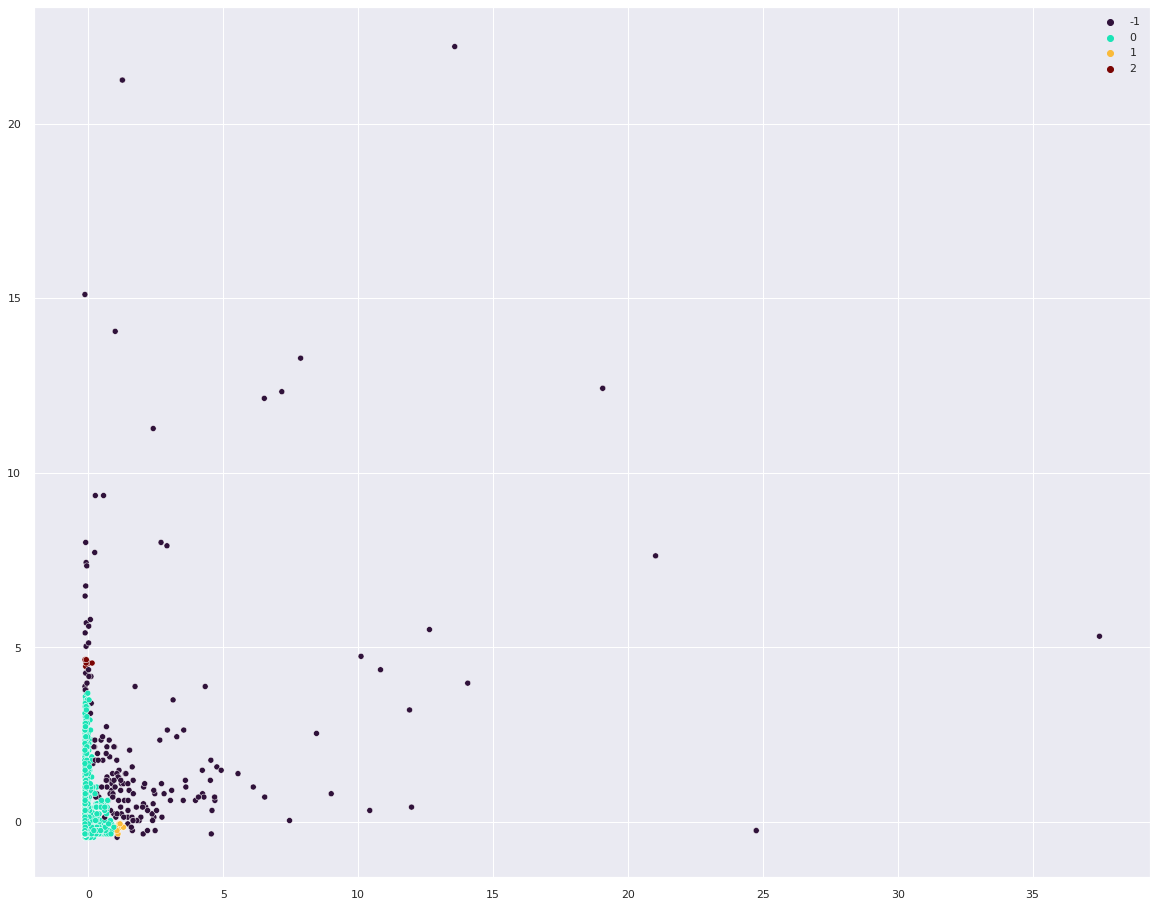

In [157]:
clustering = DBSCAN(eps=0.15, min_samples=7)
y_pred = clustering.fit_predict(X_scaled)

plt.rcParams["figure.figsize"] = [20, 16]
print(np.unique(y_pred))

sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=y_pred, palette='turbo')

In [158]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [159]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

# # https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
distance_mat = pdist(X_scaled) # pdist посчитает нам верхний треугольник матрицы попарных расстояний

Z = hierarchy.linkage(distance_mat, 'ward') # linkage — реализация агломеративного алгоритма
# plt.figure(figsize=(20, 10))
# dn = hierarchy.dendrogram(Z, leaf_font_size=8., leaf_rotation=90.)

In [160]:
from scipy.cluster.hierarchy import dendrogram

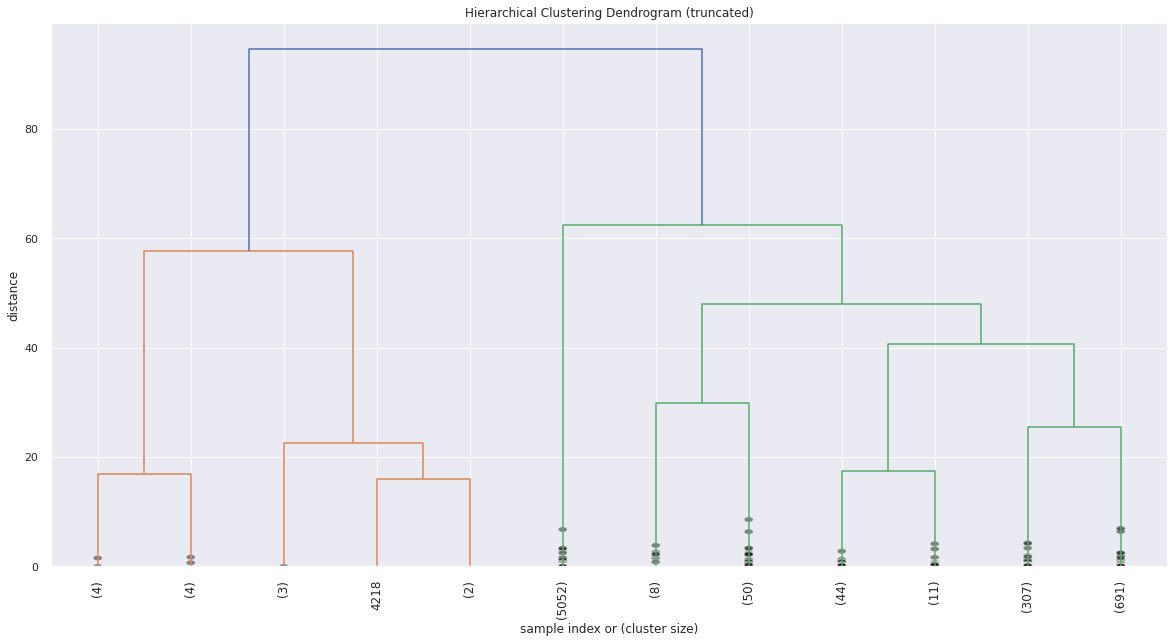

In [161]:
plt.figure(figsize=(20, 10))
# выводим размеры кластеров

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,                   # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,   # to get a distribution impression in truncated branches
)
plt.show()

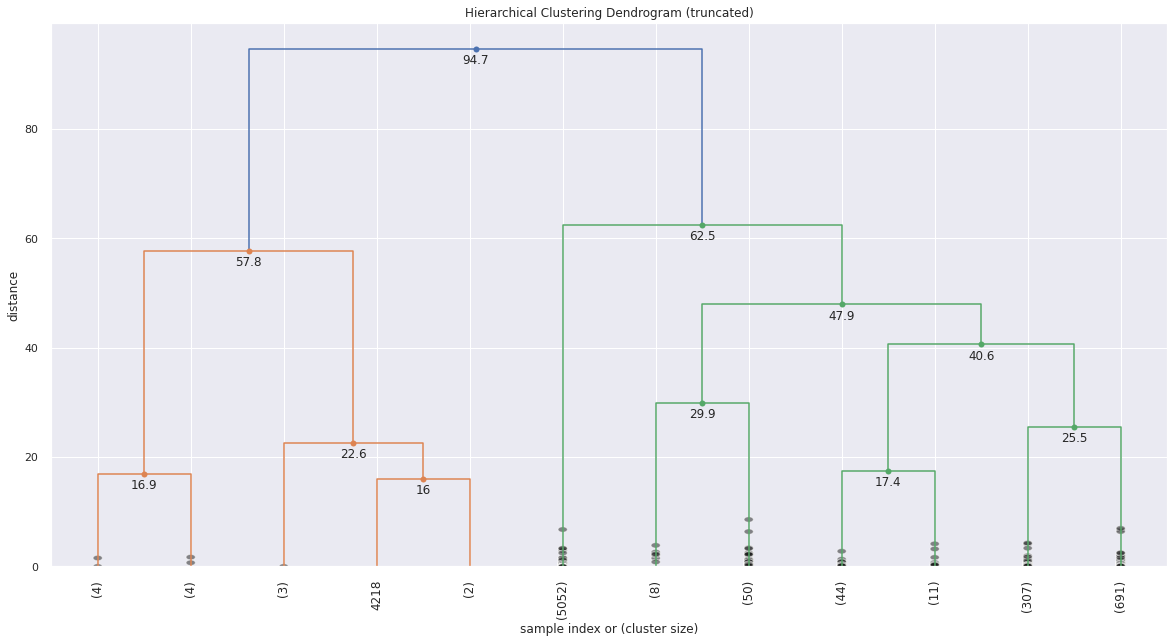

In [162]:
plt.figure(figsize=(20, 10))
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
)
plt.show()

## Наконец-то адекватный результат!

[1 2 3 4 5 6 7 8]


<AxesSubplot:>

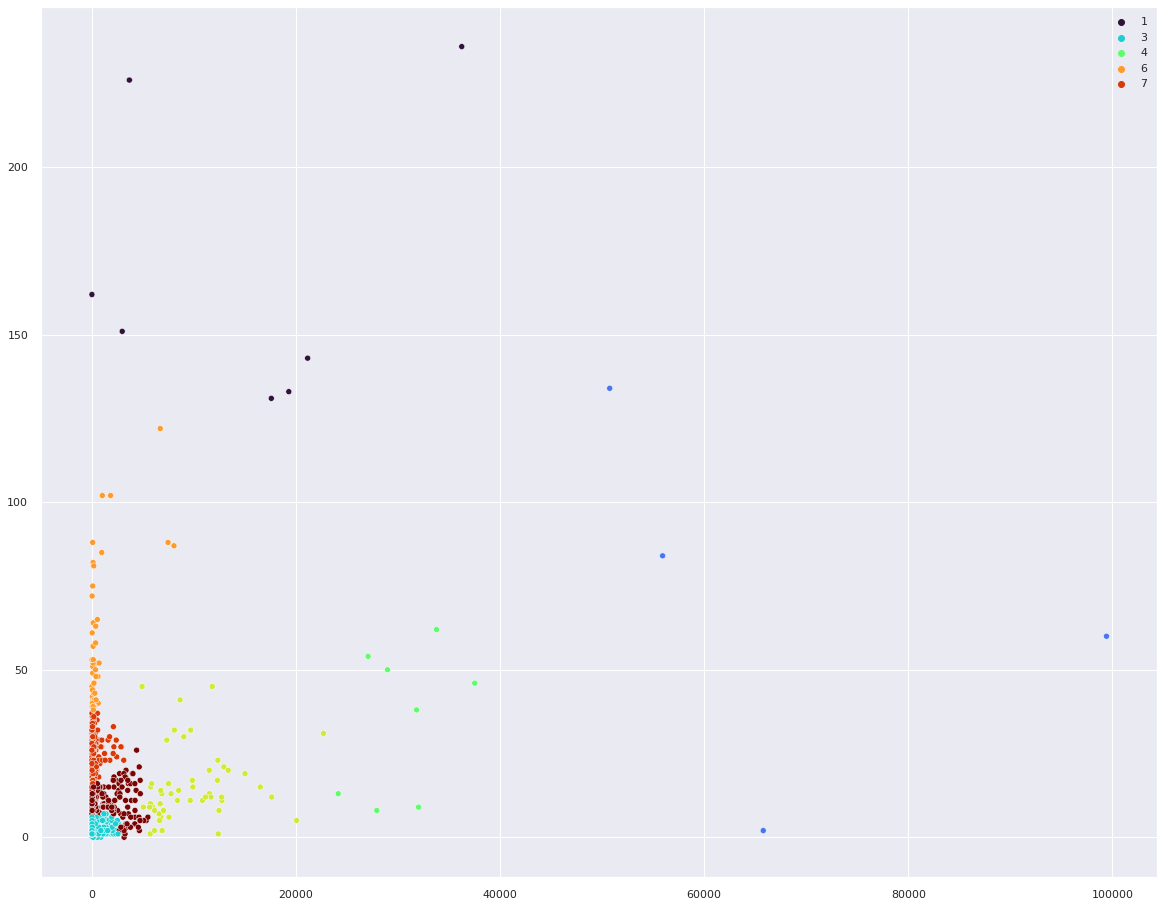

In [184]:
# Зная расстояние
from scipy.cluster.hierarchy import fcluster
# max_d = 25 # Шикарный результат!
max_d = 25
clusters = fcluster(Z, max_d, criterion='distance')
print(np.unique(clusters))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=clusters, palette='turbo')

- Мем
- заметка
- мини_подборка
- статья
- подборка
- супер_подборка
- лонгрид
- супер_лонгрид

https://scikit-learn.org/stable/modules/mixture.html

https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.inconsistent.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc

https://scikit-learn.org/stable/modules/preprocessing.html



https://medium.com/@krishnakummar/donut-chart-with-python-matplotlib-d411033c960b

https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html

https://stackoverflow.com/questions/36296101/donut-chart-python

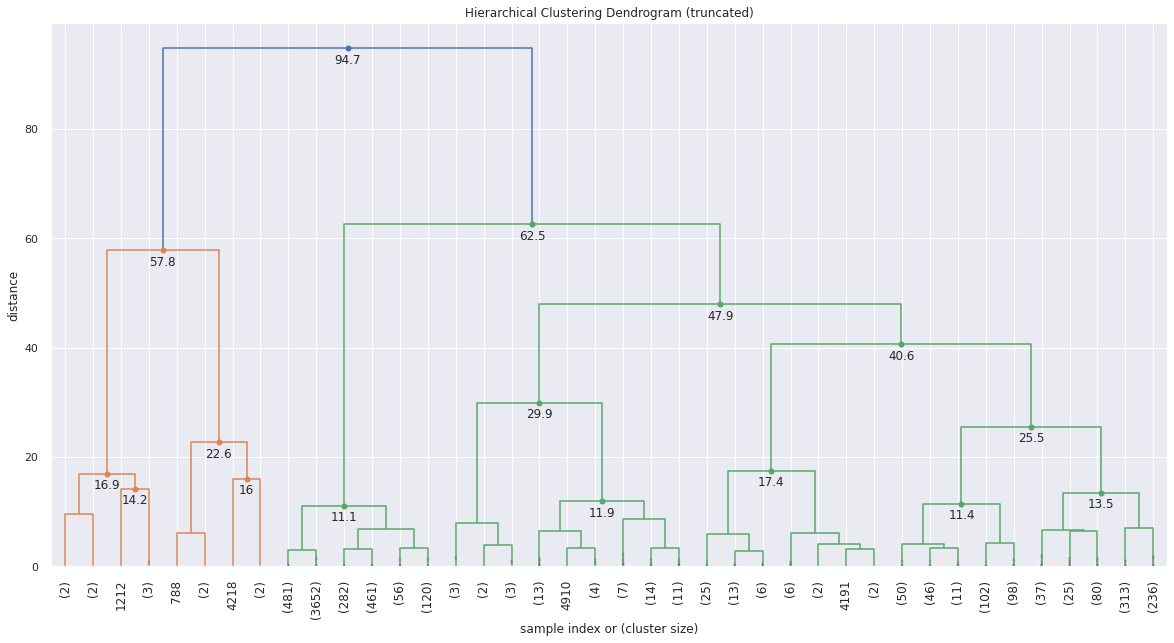

In [173]:
plt.figure(figsize=(20, 10))
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=40,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
)
plt.show()

https://stackoverflow.com/questions/28988627/pandas-correlation-groupby

In [176]:
df[df.symbols > 40000]

,date,id,url,author,commentsCount,favoritesCount,hitsCount,isRepost,likes,subsite,...,symbols,words,images,videos,links,hashtags,exotic_media_type,hour,weekday,is_weekend
788,2020-08-09 19:23:14,185045,https://dtf.ru/anime/185045-po-volnam-i-okeana...,"{'id': 10527, 'url': 'https://dtf.ru/u/10527-s...",278,921,26134,True,551,Аниме,...,55922,8056,71,11,2,"[#топы, #мнения*, #месяцморей*]",0,19,Sunday,1
3332,2020-11-09 02:12:29,252243,https://dtf.ru/s/weaboo/252243-rasskaz-na-konk...,"{'id': 65156, 'url': 'https://dtf.ru/u/65156-a...",10,10,230,True,11,Виабу,...,65786,10535,2,0,0,[#%D0%97%D0%B0%D0%B2%D0%B8%D1%81%D0%B8%D0%BC%D...,{audio},2,Monday,0
3333,2020-11-09 02:12:29,252243,https://dtf.ru/s/weaboo/252243-rasskaz-na-konk...,"{'id': 65156, 'url': 'https://dtf.ru/u/65156-a...",10,10,230,False,11,Виабу,...,65786,10535,2,0,0,[#%D0%97%D0%B0%D0%B2%D0%B8%D1%81%D0%B8%D0%BC%D...,{audio},2,Monday,0
4218,2020-12-08 19:34:50,274411,https://dtf.ru/u/145967-artem-patlusov/274411-...,"{'id': 145967, 'url': 'https://dtf.ru/u/145967...",109,69,1802,True,77,Артём Патлусов,...,99422,15959,57,3,0,"[#storyline), #masami), #yuri), #daygame), #yo...",{incut},19,Tuesday,0
5313,2021-01-21 10:58:24,605244,https://dtf.ru/s/weaboo/605244-vocaloid-yamaha...,"{'id': 296493, 'url': 'https://dtf.ru/u/296493...",128,220,4259,True,183,Виабу,...,50740,7533,55,76,3,"[#00-), #10-), #20-), #21-), #22-), #23-), #24...","{incut, audio}",10,Thursday,0
5314,2021-01-21 10:58:24,605244,https://dtf.ru/s/weaboo/605244-vocaloid-yamaha...,"{'id': 296493, 'url': 'https://dtf.ru/u/296493...",128,220,4259,False,183,Виабу,...,50740,7533,55,76,3,"[#00-), #10-), #20-), #21-), #22-), #23-), #24...","{incut, audio}",10,Thursday,0


In [182]:
df[sum([df.images, df.videos, df.links]) > 150]

,date,id,url,author,commentsCount,favoritesCount,hitsCount,isRepost,likes,subsite,...,symbols,words,images,videos,links,hashtags,exotic_media_type,hour,weekday,is_weekend
100,2020-07-16 15:13:31,171368,https://dtf.ru/s/weaboo/171368-nani-posmotret,"{'id': 183408, 'url': 'https://dtf.ru/u/183408...",35,36,252,False,20,Виабу,...,0,0,162,0,0,[],0,15,Thursday,0
1212,2020-09-06 17:03:07,124146,https://dtf.ru/anime/124146-oruzhie-i-tehnika-...,"{'id': 92907, 'url': 'https://dtf.ru/u/92907-a...",59,226,8194,True,180,Аниме,...,36242,3276,236,0,0,"[#y1);, #y2);, #y3);, #y4);, #y5)., #%D0%91%D0...",{person},17,Sunday,1
4111,2020-12-05 01:41:11,265694,https://dtf.ru/s/weaboo/265694-podborka-krasiv...,"{'id': 133031, 'url': 'https://dtf.ru/u/133031...",11,44,7947,False,33,Виабу,...,3671,385,226,0,0,"[#forward-to-the-sky), #sword-art-online), #tr...",0,1,Saturday,1
4112,2020-12-05 01:41:11,265694,https://dtf.ru/s/weaboo/265694-podborka-krasiv...,"{'id': 133031, 'url': 'https://dtf.ru/u/133031...",11,44,7947,True,33,Виабу,...,3671,385,226,0,0,"[#forward-to-the-sky), #sword-art-online), #tr...",0,1,Saturday,1
5694,2021-02-07 16:24:26,634631,https://dtf.ru/s/cp2077/634631-yaponskiy-brend...,"{'id': 311465, 'url': 'https://dtf.ru/s/cp2077...",180,75,14377,True,163,Cyberpunk 2077,...,2967,427,151,0,0,"[#cyberpunk2077, #cdprojektred, #supergroupies...",0,16,Sunday,1


https://stackoverflow.com/questions/47311632/jupyter-how-to-rotate-3d-graph

https://stackoverflow.com/questions/33436221/displaying-rotatable-3d-plots-in-ipython-or-jupyter-notebook

https://matplotlib.org/2.2.5/gallery/mplot3d/rotate_axes3d.html

https://stackoverflow.com/questions/49981313/rotate-interactively-a-3d-plot-in-python-matplotlib-jupyter-notebook

https://stackoverflow.com/questions/14261903/how-can-i-open-the-interactive-matplotlib-window-in-ipython-notebook

https://stackoverflow.com/questions/38326983/how-to-rotate-a-3d-surface-in-matplotlib

https://matplotlib.org/stable/gallery/mplot3d/surface3d.html

https://stackoverflow.com/questions/9170838/surface-plots-in-matplotlib

https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

https://stackoverflow.com/questions/36296101/donut-chart-python

https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html

https://medium.com/@krishnakummar/donut-chart-with-python-matplotlib-d411033c960b

In [ ]:
df[(df.words < 50) & (sum([df.images, df.videos, df.links]).eq(1))]

In [ ]:
sum([df.images, df.videos, df.links]).eq(1)

In [ ]:
df['class'] = np.where((df.words < 50) & (sum([df.images, df.videos, df.links]).eq(1)), 0, 1)

In [ ]:
df['class']

In [ ]:
df.head()

In [ ]:
sns.scatterplot(x=df.symbols, y=sum([df.images, df.videos, df.links]), hue='class', data=df)

In [ ]:
df.words.sort_values()

In [ ]:
# [x for x in range(0,20000,50)]

In [ ]:
sns.histplot(df.words.sort_values(), bins=[50,250,500,1000,2000,5000,10000,20000]) #bins=[x for x in range(0,20000,50)]

In [ ]:
df.groupby(['class', 'isRepost']).agg({'likes': ["sum", "median", "mean", "max", "min"]})

In [ ]:
df.likes.sum()

In [ ]:
df[(df['class'] == 0) & (df['likes'] > 500)]

In [ ]:
df[df['likes'] < 0]

# Аналитика за февраль

In [ ]:
df.set_index('date', inplace=True)
df.index = pd.to_datetime(df.index)

In [ ]:
fev_subs = df["2021-02"]
fev_subs.reset_index(inplace=True)
fev_subs.head()

In [ ]:
fev_subs.tail()

In [ ]:
fev_subs.shape

In [ ]:
import matplotlib as mpl
sns.set_palette('husl', 10)

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n{:d} posts".format(pct, absolute)

plt.rcParams["figure.figsize"] = [14, 10]
mpl.rcParams['font.size'] = 14.0

labels = 'Статья подсайта', 'Репост'
sizes = fev_subs.groupby(['isRepost']).agg({'id': "count"})['id'].values
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(sizes, explode=explode, labels=labels, autopct=lambda pct: func(pct, sizes), #shadow=True, 
        startangle=90)

texts[0].set_fontsize(14)
texts[1].set_fontsize(14)

ax1.axis('equal')
plt.title('Доля репостов от общего количества публикаций за февраль', fontsize=22, pad=20)

# plt.savefig(PATH + "March_2021/part_of_reposts.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
fev_subs.commentsCount.sum()

In [ ]:
fev_subs.groupby(["isRepost"]).commentsCount.sum()

In [ ]:
import matplotlib as mpl

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n{:d} comments".format(pct, absolute)

sns.set_theme()
sns.set_palette("pastel")

plt.rcParams["figure.figsize"] = [14, 10]
mpl.rcParams['font.size'] = 14.0

labels = 'Статья подсайта', 'Репост'
sizes = fev_subs.groupby(["isRepost"]).commentsCount.sum().values
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(sizes, explode=explode, labels=labels, 
                                    autopct=lambda pct: func(pct, sizes), #shadow=True, 
        startangle=90)

texts[0].set_fontsize(14)
texts[1].set_fontsize(14)
ax1.axis('equal')
plt.title('Количество комментариев в публикациях за февраль', fontsize=22, pad=20)

# plt.savefig(PATH + "March_2021/comments_parted.png", dpi=300, bbox_inches='tight')
plt.show()

sns.set_theme()

In [ ]:
sns.set_theme()

In [ ]:
from pandas.plotting import table 

In [ ]:
fev_subs.groupby(['isRepost']).agg({'commentsCount': ["sum", "median", "mean", "max", "min"]})

In [ ]:
# ax = plt.subplot(111, frame_on=False) # no visible frame
# ax.xaxis.set_visible(False)  # hide the x axis
# ax.yaxis.set_visible(False)  # hide the y axis

# table(ax, fev_subs.groupby(['isRepost']).agg({'commentsCount': ["sum", "median", "mean", "max", "min"]}))  # where df is your data frame
# plt.tight_layout()
# plt.savefig(PATH + "March_2021/test_table.png", dpi=300, bbox_inches='tight')
# plt.show()

In [ ]:
# sns.histplot(x = fev_subs.commentsCount, data=fev_subs, hue="isRepost", kde=True)
sns.displot(x = fev_subs.commentsCount, data=fev_subs, col="isRepost", kde=True)

Надо попробовать посчитать количество уникальных авторов, которые зарепосчены извне.

In [ ]:
len(fev_subs[fev_subs.isRepost == False].author_name.unique())

In [ ]:
len(fev_subs[fev_subs.isRepost == True].author_name.unique())

In [ ]:
fev_subs[(fev_subs.isRepost == False) & (fev_subs.title != "Статья удалена")].likes.sum()

In [ ]:
fev_subs.groupby(['isRepost']).author_name.unique()

In [ ]:
fev_subs.author_name.unique()

In [ ]:
fev_subs.columns

In [ ]:
fev_subs.hitsCount.sum()

In [ ]:
fev_subs.groupby(['isRepost']).agg({'hitsCount': ["sum", "median", "mean", "max", "min"]})

In [ ]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n{:d} просмотров".format(pct, absolute)

sns.set_palette("rainbow")

plt.rcParams["figure.figsize"] = [14, 10]
mpl.rcParams['font.size'] = 14.0

labels = 'Статья подсайта', 'Репост'
sizes = fev_subs.groupby(["isRepost"]).hitsCount.sum().values
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(sizes, explode=explode, labels=labels, autopct=lambda pct: func(pct, sizes), #shadow=True, 
        startangle=90)

texts[0].set_fontsize(14)
texts[1].set_fontsize(14)

ax1.axis('equal')
plt.title('Просмотры публикаций за февраль', fontsize=22, pad=20)

# plt.savefig(PATH + "March_2021/part_of_reposts_hits.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
fev_subs.favoritesCount.sum()

In [ ]:
fev_subs.groupby(['isRepost']).agg({'favoritesCount': ["sum", "median", "mean", "max", "min"]})

In [ ]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n{:d} добавлений в закладки".format(pct, absolute)

sns.set_palette("summer")

plt.rcParams["figure.figsize"] = [14, 10]
mpl.rcParams['font.size'] = 12.0

labels = 'Статья подсайта', 'Репост'
sizes = fev_subs.groupby(["isRepost"]).favoritesCount.sum().values
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(sizes, explode=explode, labels=labels, autopct=lambda pct: func(pct, sizes), #shadow=True, 
        startangle=90)

texts[0].set_fontsize(14)
texts[1].set_fontsize(14)

ax1.axis('equal')
plt.title('Добавления статей в закладки за февраль', fontsize=22, pad=20)

# plt.savefig(PATH + "March_2021/part_of_reposts_fav.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
fev_subs.likes.sum()

In [ ]:
fev_subs[fev_subs.title != 'Статья удалена'].likes.sum()

In [ ]:
fev_subs[fev_subs.title != 'Статья удалена'].groupby(['isRepost']).agg({'likes': ["sum", "median", "mean", "max", "min"]})

In [ ]:
18492 + 4570

In [ ]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n{:d} лайков".format(pct, absolute)

sns.set_palette("Spectral")

plt.rcParams["figure.figsize"] = [14, 10]
mpl.rcParams['font.size'] = 14.0

labels = 'Статья подсайта', 'Репост'
sizes = fev_subs[fev_subs.title != 'Статья удалена'].groupby(["isRepost"]).likes.sum().values
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(sizes, explode=explode, labels=labels, autopct=lambda pct: func(pct, sizes), #shadow=True, 
        startangle=90)

texts[0].set_fontsize(14)
texts[1].set_fontsize(14)

ax1.axis('equal')
plt.title('Количество лайков за февраль', fontsize=22, pad=20)

# plt.savefig(PATH + "March_2021/part_of_reposts_likes.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# fev_subs.likes[fev_subs.isRepost == True]
# fev_subs.likes[fev_subs.isRepost == False]

In [ ]:
# fev_subs.groupby(['isRepost']).agg({})

In [ ]:
f, axes = plt.subplots(1, 2, sharey=True, sharex=True)
f.suptitle("Распределение количества лайков у постов")

sns.histplot(x = fev_subs.likes[fev_subs.isRepost == False], 
             data=fev_subs, kde=True, ax=axes[0], bins=20).set_title("Посты подсайта")

sns.histplot(x = fev_subs.likes[fev_subs.isRepost == True], 
             data=fev_subs, kde=True, ax=axes[1], bins=20).set_title("Репосты")


# plt.savefig(PATH + "March_2021/part_of_reposts_dist_likes.png", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
fev_subs.symbols.sum()

In [ ]:
fev_subs.images.sum() + fev_subs.videos.sum() + fev_subs.links.sum()

In [ ]:
tmp_2 = fev_subs[fev_subs.isRepost == False].groupby(['author_name','author_avatar_url'], as_index=False).agg({"likes": "sum"}) \
.sort_values(by="likes", ascending=False).head(20)
tmp_2.head(10)

In [ ]:
sum(tmp_2.likes[:5])

In [ ]:
sum(tmp_2.likes[:5]) / (fev_subs[(fev_subs.isRepost == False) & (fev_subs.title != "Статья удалена")].likes.sum()) * 100

In [ ]:
plt.rcParams["figure.figsize"] = [14, 20]

my_cmap = plt.get_cmap("coolwarm")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

labels = tmp_2.author_avatar_url[::-1]
# colors = ['lightcoral', 'orchid', 'peachpuff', 'coral', 'tan', 'indigo', 'goldenrod', 'pink', 'darkturquoise', 'teal'][::-1]
values = tmp_2.likes[::-1] 

height = 0.9
plt.barh(y=tmp_2.author_name[::-1], width=tmp_2.likes[::-1], height=height, 
         color=my_cmap(rescale(values)), 
         align='center')

for i, (label, value) in enumerate(zip(labels, values)):
    im = Image.open(requests.get(label, stream=True).raw)
    plt.imshow(im, extent=[value - 200, value - 20, i - height / 2.5, i + height / 2.5], aspect='auto', zorder=2)
    plt.text(value + 1, i, '{:1.0f}'.format(value), ha = 'left', va = 'center')

    
plt.xlim(0, max(values) * 1.05)
plt.ylim(-0.5, len(labels) - 0.5)
plt.xlabel('Сумма рейтинга за месяц', fontsize=16)
plt.ylabel('Авторы', fontsize=16)
plt.title('Топ-20 авторов по сумме рейтинга за февраль', fontsize=22, pad=20)
plt.tight_layout()

# plt.savefig(PATH + "March_2021/authors_top20_sum_likes.png", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
tmp_3 = fev_subs[fev_subs.isRepost == False].groupby(['author_name','author_avatar_url'], as_index=False).count() \
.sort_values(by="id", ascending=False).iloc[:, [0,1,3]].head(10)
tmp_3.head(20)

In [ ]:
sum(tmp_3.id[:3])

In [ ]:
sum(tmp_3.id[:3]) / 518 * 100

In [ ]:
plt.rcParams["figure.figsize"] = [14, 10]

labels = tmp_3.author_avatar_url[::-1]
colors = ['lightcoral', 'orchid', 'tan', 'peachpuff', 'goldenrod', 'darkred', 'darkturquoise', 'indigo', 'coral', 'pink'][::-1]
values = tmp_3.id[::-1] 

height = 0.9
plt.barh(y=tmp_3.author_name[::-1], width=tmp_3.id[::-1], height=height, color=colors, align='center')

for i, (label, value) in enumerate(zip(labels, values)):
    im = Image.open(requests.get(label, stream=True).raw)
    plt.imshow(im, extent=[value - 8, value - 2, i - height / 2.5, i + height / 2.5], aspect='auto', zorder=2)
    plt.text(value + 1, i, '{:1.0f}'.format(value), ha = 'left', va = 'center')

    
plt.xlim(0, max(values) * 1.05)
plt.ylim(-0.5, len(labels) - 0.5)
plt.xlabel('Количество постов за месяц', fontsize=16)
plt.ylabel('Авторы', fontsize=16)
plt.title('Топ-10 авторов по количеству постов за февраль', fontsize=22, pad=20)
plt.tight_layout()

# plt.savefig(PATH + "March_2021/authors_top10_posts.png", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
tmp_4 = fev_subs[(fev_subs.isRepost == False)].sort_values(by='likes', ascending=False).head(10).loc[:, ["id", 'author_name','author_avatar_url', 'title', "likes", 'date']]
# tmp_4.loc[137, 'title'] = 'Японский бренд совместно с CDPR представил линейку одежды и ...'
tmp_4.loc[581, 'title'] = "Запись пользователя Over9k5000"
tmp_4.loc[99, 'title'] = "Запись пользователя СынМаэстро"
# tmp_4 = tmp_4[tmp_4.index != 128]
tmp_4

In [ ]:
# tmp_4 = fev_subs.sort_values(by='likes', ascending=False).head(10).loc[:, ["id", 'author_name','author_avatar_url', 'title', "likes", 'date']]
# tmp_4.loc[137, 'title'] = 'Японский бренд совместно с CDPR представил линейку одежды и ...'
# # tmp_4.loc[383, 'title'] = 'Спорт, офис, чулочки и жаркое лето от infin...'
# # tmp_4.loc[581, 'title'] = "Запись пользователя Over9k5000"
# # tmp_4.loc[99, 'title'] = "Запись пользователя СынМаэстро"
# # # tmp_4 = tmp_4[tmp_4.index != 128]
# tmp_4

In [ ]:
from matplotlib import cm

labels = tmp_4.title[::-1]#.astype('str')
values = tmp_4.likes[::-1]

my_cmap = plt.get_cmap("Wistia")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
height = 0.9

plt.barh(y=tmp_4.id[::-1].astype("str"), 
         width=values, height=height, 
         align='center', color=my_cmap(rescale(values)))

for i, (label, value) in enumerate(zip(labels, values)):
    plt.text(value + 1, i, '{:1.0f}'.format(value), ha = 'left', va = 'center')
    plt.text(5, i, '{}'.format(label), ha = 'left', va = 'center')

    
plt.xlim(0, max(values) * 1.05)
plt.ylim(-0.5, len(labels) - 0.5)
plt.xlabel('Количество лайков', fontsize=16)
plt.ylabel('ID публикации', fontsize=16)
plt.title('Топ-10 публикаций по лайкам за февраль', fontsize=22, pad=20)
plt.tight_layout()

plt.savefig(PATH + "March_2021/top10_posts_likes.png", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
tmp_5 = fev_subs[(fev_subs.isRepost == False)].sort_values(by='hitsCount', ascending=False).head(11).loc[:, ["id", 'author_name','author_avatar_url', 'title', "hitsCount", 'date']]
tmp_5.loc[237, 'title'] = 'Арифурэта: Сильнейший ремесленник в мире. Как ...'
tmp_5.loc[159, 'title'] = '( ͡° ͜ʖ ͡°) Интересный музей в ...' 
tmp_5.loc[353, 'title'] = 'Чулочки, каре и немного игривости от ...' 
tmp_5.loc[339, 'title'] = 'Он вам не Rintarou Okabe (перез...' 
tmp_5.loc[383, 'title'] = 'Спорт, офис, чулочки и жарк...' 
tmp_5.loc[475, 'title'] = "RASP/28 Подборка работ ..."
tmp_5 = tmp_5[tmp_5.index != 128]
tmp_5

In [ ]:
# tmp_5 = fev_subs.sort_values(by='hitsCount', ascending=False).head(10).loc[:, ["id", 'author_name','author_avatar_url', 'title', "hitsCount", 'date']]
# # tmp_5.loc[237, 'title'] = 'Арифурэта: Сильнейший ремесленник в мире. Как ...'
# # tmp_5.loc[159, 'title'] = '( ͡° ͜ʖ ͡°) Интересный музей в ...' 
# # tmp_5.loc[353, 'title'] = 'Чулочки, каре и немного игривости от ...' 
# # tmp_5.loc[339, 'title'] = 'Он вам не Rintarou Okabe (перез...' 
# # tmp_5.loc[383, 'title'] = 'Спорт, офис, чулочки и жарк...' 
# # tmp_5.loc[475, 'title'] = "RASP/28 Подборка работ ..."
# # tmp_5 = tmp_5[tmp_5.index != 128]
# # tmp_5['title'] = tmp_5['title'].str.slice(0,30) + str("...")
# tmp_5.loc[587, 'title'] = "Удивительный мир видеоигр по мотивам Neon Gene..."
# tmp_5.loc[380, 'title'] = "Neon Genesis Evangelion и эмоции, ..."
# tmp_5.loc[123, 'title'] = 'Отзыв на мангу "О т...'
# # tmp_5.loc[432, 'title'] = 'Гость Блогосф...'
# tmp_5

In [ ]:
from matplotlib import cm

labels = tmp_5.title[::-1]#.astype('str')
values = tmp_5.hitsCount[::-1]

my_cmap = plt.get_cmap("summer")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
height = 0.9

plt.barh(y=tmp_5.id[::-1].astype("str"), 
         width=values, height=height, 
         align='center', color=my_cmap(rescale(values)))

for i, (label, value) in enumerate(zip(labels, values)):
    plt.text(value + 1, i, '{:1.0f}'.format(value), ha = 'left', va = 'center')
    plt.text(50, i, '{}'.format(label), ha = 'left', va = 'center')

    
plt.xlim(0, max(values) * 1.05)
plt.ylim(-0.5, len(labels) - 0.5)
plt.xlabel('Количество просмотров', fontsize=16)
plt.ylabel('ID публикации', fontsize=16)
plt.title('Топ-10 публикаций по просмотрам за февраль', fontsize=22, pad=20)
plt.tight_layout()

# plt.savefig(PATH + "March_2021/top10_posts_hits_alter.png", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
tmp_6 = fev_subs[(fev_subs.isRepost == False)].sort_values(by='commentsCount', ascending=False).head(11).loc[:, ["id", 'author_name','author_avatar_url', 'title', "commentsCount", 'date']]
# tmp_6.loc[137, 'title'] = 'Японский бренд совместно с CDPR представил линейку одежды и ...'
# tmp_6['title'] = tmp_6['title'].str.slice(0,50)
tmp_6.loc[237, 'title'] = 'Арифурэта: Сильнейший ремесленник в мире. Как ...'
tmp_6 = tmp_6[tmp_6.index != 128]
tmp_6

In [ ]:
tmp_6 = fev_subs.sort_values(by='commentsCount', ascending=False).head(10).loc[:, ["id", 'author_name','author_avatar_url', 'title', "commentsCount", 'date']]
tmp_6.loc[137, 'title'] = 'Японский бренд совместно с CDPR представил ...'
# tmp_6['title'] = tmp_6['title'].str.slice(0,50)
# tmp_6.loc[237, 'title'] = 'Арифурэта: Сильнейший ремесленник в мире. Как ...'
# tmp_6 = tmp_6[tmp_6.index != 128]
tmp_6.loc[587, 'title'] = "Удивительный мир ..."
tmp_6.loc[380, 'title'] = "Neon Genesis Evangelion и ..."
tmp_6.loc[197, 'title'] = 'Беспокойные Сердца - ...'
tmp_6.loc[375, 'title'] = 'Re:DTF Жизнь с нуля в...'
tmp_6

In [ ]:
labels = tmp_6.title[::-1]#.astype('str')
values = tmp_6.commentsCount[::-1]

my_cmap = plt.get_cmap("coolwarm")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
height = 0.9

plt.barh(y=tmp_6.id[::-1].astype("str"), 
         width=values, height=height, 
         align='center', color=my_cmap(rescale(values)))

for i, (label, value) in enumerate(zip(labels, values)):
    plt.text(value + 1, i, '{:1.0f}'.format(value), ha = 'left', va = 'center')
    plt.text(2, i, '{}'.format(label), ha = 'left', va = 'center')

    
plt.xlim(0, max(values) * 1.05)
plt.ylim(-0.5, len(labels) - 0.5)
plt.xlabel('Количество комментариев', fontsize=16)
plt.ylabel('ID публикации', fontsize=16)
plt.title('Топ-10 публикаций по количеству комментариев за февраль', fontsize=22, pad=20)
plt.tight_layout()

# plt.savefig(PATH + "March_2021/alter_top10_posts_comments_alter.png", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
tmp_7 = fev_subs[(fev_subs.isRepost == False)].sort_values(by='favoritesCount', ascending=False).head(11).loc[:, ["id", 'author_name','author_avatar_url', 'title', "favoritesCount", 'date']]
# tmp_7['title'] = tmp_7['title'].str.slice(0,25) + str("...")
tmp_7 = tmp_7[tmp_7.index != 128]
tmp_7.loc[339, 'title'] = 'Он вам не Rintarou Okabe (перезалив, автор Mah...' 
tmp_7

In [ ]:
tmp_7 = fev_subs.sort_values(by='favoritesCount', ascending=False).head(10).loc[:, ["id", 'author_name','author_avatar_url', 'title', "favoritesCount", 'date']]
# tmp_7['title'] = tmp_7['title'].str.slice(0,25) + str("...")
# tmp_7 = tmp_7[tmp_7.index != 128]
# tmp_7.loc[339, 'title'] = 'Он вам не Rintarou Okabe (перезалив, автор Mah...' 
# tmp_7.loc[587, 'title'] = "Удивительный мир ..."
# tmp_7.loc[380, 'title'] = "Neon Genesis Evangelion и ..."
tmp_7.loc[197, 'title'] = 'Беспокойные Сердца - Замечатель...'
tmp_7.loc[353, 'title'] = 'Чулочки, каре и немного игривости ...' 
tmp_7.loc[136, 'title'] = 'Столько интересных аниме п...'
tmp_7.loc[137, 'title'] = 'Японский бренд совм...'
tmp_7.loc[123, 'title'] = 'Отзыв на мангу "О т...'
tmp_7

In [ ]:
plt.rcParams["figure.figsize"] = [16, 10]

labels = tmp_7.title[::-1]#.astype('str')
values = tmp_7.favoritesCount[::-1]

my_cmap = plt.get_cmap("Spectral")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
height = 0.9

plt.barh(y=tmp_7.id[::-1].astype("str"), 
         width=values, height=height, 
         align='center', color=my_cmap(rescale(values)))

for i, (label, value) in enumerate(zip(labels, values)):
    plt.text(value + 1, i, '{:1.0f}'.format(value), ha = 'left', va = 'center')
    plt.text(2, i, '{}'.format(label), ha = 'left', va = 'center')

    
plt.xlim(0, max(values) * 1.05)
plt.ylim(-0.5, len(labels) - 0.5)
plt.xlabel('Количество добавлений в закладки', fontsize=16)
plt.ylabel('ID публикации', fontsize=16)
plt.title('Топ-10 публикаций по количеству добавлений в закладки за февраль', fontsize=22, pad=20)
plt.tight_layout()

# plt.savefig(PATH + "March_2021/alter_top10_posts_favorites_alter.png", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
# fev_subs[(fev_subs["images"] + fev_subs["videos"] + fev_subs["links"]) < 100]

In [ ]:
tmp = fev_subs[#(fev_subs.symbols < 10000) 
               #& ((fev_subs["images"] + fev_subs["videos"] + fev_subs["links"]) < 100) & 
               (fev_subs.isRepost == False)]

In [ ]:
plt.rcParams["figure.figsize"] = [14, 10]

ax = sns.scatterplot(x=tmp.symbols, hue=tmp.likes, 
                y=sum([tmp.images, tmp.videos, tmp.links]), data=tmp, 
                palette = "rocket_r")
                #cmap="icefire")
ax.set_title('Диаграмма зависимости количества лайков от количества символов и медиаконтента в статье', fontsize=18, pad=20)
ax.get_legend().set_title('Лайки')
plt.setp(ax.get_legend().get_texts(), fontsize='14') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title

ax.set_xlabel('Количество символов в статье', fontsize='16')
ax.set_ylabel('Количество медиаконтента в статье', fontsize='16');

plt.savefig(PATH + "March_2021/scatterplot.png", dpi=300, bbox_inches='tight')

In [ ]:
tmp_8 = fev_subs[(fev_subs.isRepost == False) & (fev_subs.symbols > 2000)].sort_values(by='likes', ascending=False).head(10) \
.loc[:, ["id", 'author_name','author_avatar_url', 'title', "likes", 'date', 'symbols']]
# tmp_4.loc[137, 'title'] = 'Японский бренд совместно с CDPR представил линейку одежды и ...'
# tmp_8.loc[581, 'title'] = "Запись пользователя Over9k5000"
tmp_8.loc[237, 'title'] = "Арифурэта: Сильнейший ремесл..."
tmp_8

In [ ]:
labels = tmp_8.title[::-1]#.astype('str')
values = tmp_8.likes[::-1]

my_cmap = plt.get_cmap("Wistia")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
height = 0.9

plt.barh(y=tmp_8.id[::-1].astype("str"), 
         width=values, height=height, 
         align='center', color=my_cmap(rescale(values)))

for i, (label, value) in enumerate(zip(labels, values)):
    plt.text(value + 1, i, '{:1.0f}'.format(value), ha = 'left', va = 'center')
    plt.text(2, i, '{}'.format(label), ha = 'left', va = 'center')

    
plt.xlim(0, max(values) * 1.05)
plt.ylim(-0.5, len(labels) - 0.5)
plt.xlabel('Количество лайков', fontsize=16)
plt.ylabel('ID публикации', fontsize=16)
plt.title('Топ-7 лонгридов (по лайкам) за февраль', fontsize=22, pad=20)
plt.tight_layout()

# plt.savefig(PATH + "March_2021/top7_longreads.png", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
tmp_9 = fev_subs[(fev_subs.isRepost == False) & (fev_subs.images > 5)].sort_values(by='likes', ascending=False).head(10) \
.loc[:, ["id", 'author_name','author_avatar_url', 'title', "likes", 'date']]
# tmp_4.loc[137, 'title'] = 'Японский бренд совместно с CDPR представил линейку одежды и ...'
# tmp_8.loc[581, 'title'] = "Запись пользователя Over9k5000"
# tmp_8.loc[99, 'title'] = "Запись пользователя СынМаэстро"
tmp_9

In [ ]:
labels = tmp_9.title[::-1]#.astype('str')
values = tmp_9.likes[::-1]

my_cmap = plt.get_cmap("Wistia")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
height = 0.9

plt.barh(y=tmp_9.id[::-1].astype("str"), 
         width=values, height=height, 
         align='center', color=my_cmap(rescale(values)))

for i, (label, value) in enumerate(zip(labels, values)):
    plt.text(value + 1, i, '{:1.0f}'.format(value), ha = 'left', va = 'center')
    plt.text(5, i, '{}'.format(label), ha = 'left', va = 'center')

    
plt.xlim(0, max(values) * 1.05)
plt.ylim(-0.5, len(labels) - 0.5)
plt.xlabel('Количество лайков', fontsize=16)
plt.ylabel('ID публикации', fontsize=16)
plt.title('Топ-10 подборок (по лайкам) за февраль', fontsize=22, pad=20)
plt.tight_layout()

# plt.savefig(PATH + "March_2021/top10_sets.png", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
tmp_10 = fev_subs[(fev_subs.isRepost == False) & (fev_subs.images+fev_subs.videos+fev_subs.links == 1)].sort_values(by='likes', ascending=False).head(10) \
.loc[:, ["id", 'author_name','author_avatar_url', 'title', "likes", 'date']]
# tmp_4.loc[137, 'title'] = 'Японский бренд совместно с CDPR представил линейку одежды и ...'
tmp_10.loc[581, 'title'] = "Запись пользователя Over9k5000"
tmp_10.loc[99, 'title'] = "Запись пользователя СынМаэстро"
tmp_10.loc[429, 'title'] = "Запись пользователя Лолег"
tmp_10.loc[430, 'title'] = "Запись пользователя Лолег"
tmp_10.loc[381, 'title'] = "Запись пользователя Diego Paw"
tmp_10

In [ ]:
labels = tmp_10.title[::-1]#.astype('str')
values = tmp_10.likes[::-1]

my_cmap = plt.get_cmap("Wistia")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
height = 0.9

plt.barh(y=tmp_10.id[::-1].astype("str"), 
         width=values, height=height, 
         align='center', color=my_cmap(rescale(values)))

for i, (label, value) in enumerate(zip(labels, values)):
    plt.text(value + 1, i, '{:1.0f}'.format(value), ha = 'left', va = 'center')
    plt.text(5, i, '{}'.format(label), ha = 'left', va = 'center')

    
plt.xlim(0, max(values) * 1.05)
plt.ylim(-0.5, len(labels) - 0.5)
plt.xlabel('Количество лайков', fontsize=16)
plt.ylabel('ID публикации', fontsize=16)
plt.title('Топ-10 мемов (по лайкам) за февраль', fontsize=22, pad=20)
plt.tight_layout()

# plt.savefig(PATH + "March_2021/top10_memes.png", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = [14, 10]

ax = sns.scatterplot(x=df.symbols, hue=df.likes, 
                y=sum([df.images, df.videos, df.links]), data=df[df.isRepost == False], 
                palette = "crest")
                #cmap="icefire")
ax.set_title('Диаграмма зависимости количества лайков от количества символов и медиаконтента в статье', fontsize=18, pad=20)
ax.get_legend().set_title('Лайки')
plt.setp(ax.get_legend().get_texts(), fontsize='14') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title

ax.set_xlabel('Количество символов в статье', fontsize='16')
ax.set_ylabel('Количество медиаконтента в статье', fontsize='16');


In [ ]:
df[(df.symbols > 20000)]# & (df.isRepost == False)].author_name

In [ ]:
# fev_subs[fev_subs.likes > 150]

In [ ]:
tmp = fev_subs[fev_subs.title == "Статья удалена"]
tmp

In [ ]:
tmp.id.unique()

In [ ]:
sns.scatterplot(x=tmp.likes, #hue=tmp.subsite, 
                y=tmp.hitsCount, data=tmp)

In [ ]:
fev_subs

In [ ]:
fev_subs.set_index('date', inplace=True)
fev_subs.index = pd.to_datetime(fev_subs.index)

In [ ]:
# # #fev_subs.reset_index(inplace=True)
fev_subs.head()

In [ ]:
fev_subs["2021-02-08"]

In [ ]:
feb_ts = fev_subs.resample('D').apply({'id':'count'})
feb_ts["weekday"] = feb_ts.index.weekday
feb_ts

In [ ]:
fe = sns.barplot(data=feb_ts, x=feb_ts.index, y=feb_ts.id)
ax = fe

for item in fe.get_xticklabels():
    item.set_rotation(90)

for p in ax.patches:
             ax.annotate("%.1d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='gray', xytext=(0, 10),
                 textcoords='offset points')    
        
ax.set_title('Количество постов, публикуемых ежедневно в течение месяца', fontsize=18, pad=20)
ax.set_xlabel('Число месяца', fontsize='16')
ax.set_ylabel('Количество статей', fontsize='16');

plt.savefig(PATH + "March_2021/posts_by_day.png", dpi=300, bbox_inches='tight')

In [ ]:
feb_ts.groupby("weekday").sum()

In [ ]:
days = {'Monday': 'Понедельник', 'Tuesday': 'Вторник', 'Wednesday': 'Среда', 'Thursday': 'Четверг', 
 'Friday': 'Пятница', 'Saturday': 'Суббота',  'Sunday': 'Воскресенье'}  

from pandas.api.types import CategoricalDtype

cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
fev_subs['weekday'] = fev_subs['weekday'].astype(cat_type)
# fev_subs['weekday'].replace(to_replace=days, inplace=True)

In [ ]:
sns.set_palette('hls')

ax = sns.barplot(data=fev_subs, x=fev_subs.groupby("weekday")["id"].count().sort_index().index, 
            y=fev_subs.groupby("weekday")["id"].count().sort_index().values)

for p in ax.patches:
             ax.annotate("%.1d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='gray', xytext=(0, 10),
                 textcoords='offset points')  

ax.set_title('Количество постов, сгруппированное по дням недели', fontsize=18, pad=20)
ax.set_xlabel('День недели', fontsize='16')
ax.set_ylabel('Количество статей', fontsize='16');

plt.savefig(PATH + "March_2021/posts_by_day_sum.png", dpi=300, bbox_inches='tight')

In [ ]:
# fev_subs.groupby("weekday")["id"].count().sort_index().values